# 预测打车费 Taxi Fares Estimator

# **<font color=#4285F4>Plan</font> Stage**
纽约市计程车和豪华轿车委员会（TLC）希望根据它们掌握的历史数据，构建一个回归分析模型，让使用者可以事先预估打车费。<br>
New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency wants a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered. 
## 主要任务 Major Task
开发一个用于事前预测打车费用的回归分析模型<br>
Develop a regression model that helps estimate taxi fares before the ride
## [追加任务 Additional Task](https://www.kaggle.com/code/yvetteliuyang/automatidata-project-ii "Project II Notebook")
预测乘客是否会慷慨支付小费，并获知什么因素会影响乘客付小费<br>
Predict whether or not a rider will be a generous tipper (>= 20%)<br>
Identify which variables or factors influence the amount of gratuity a rider gives a driver

# 准备工作 Prepare Data
* **工具导入**：导入python库，载入数据
* **数据初检**：数据量（行与列的数量），有什么变量，是何种格式，什么含义，是否存在信息缺失
* 观察各个变量的**统计特征**，与打车费之间的**关系**，与其他变量间的关系，是否有**异常值**
* 初步筛选出**有影响力**的变量，并开始构想是否需要**创建新的变量**
* Import packages & Load data
* Display the data:
  Use df.head(), df.shape(), df.info() to understand the dataset, and find if any missing values。
* Describe each variables:
  Use df.describe() to exam statistics of variables. Try to see if there is abnormal values. By the help of visulization see if any coeffiecency between some variables.

## Import packages

In [1]:
# Import packages
# Packages for numerics + dataframes
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import sklearn.metrics as metrics # For confusion matrix
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# Output folder setup
import os
new_folders = ['EDA','evaluation','model']
for folder_name in new_folders:
    folder_path = f"/kaggle/working/{folder_name}"
    # Check if the folder already exists, and create it if it doesn't
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)  # Use makedirs for creating nested directories if needed
        print(f"Folder '{folder_path}' created successfully.")
    else:
        print(f"Folder '{folder_path}' already exists.")

Folder '/kaggle/working/EDA' created successfully.
Folder '/kaggle/working/evaluation' created successfully.
Folder '/kaggle/working/model' created successfully.


In [2]:
# Load dataset
df_original = pd.read_csv('/kaggle/input/yellow-taxi-trip-data-2017/C2_2017_Yellow_Taxi_Trip_Data.csv')

### 显示设置 Display setting

In [3]:
pd.set_option('display.max_columns',None)  # display all columns
pd.set_option('display.min_rows', 10) # display 5 rows of head nd tile each
import warnings
warnings.filterwarnings("ignore") # mute warnings

## 初步浏览数据 Data Exploration
所有数据的基本信息，统计指标，都可以在发布后的Input栏里看到<br>
发布时 略

In [4]:
df_original.size

408582

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
df_original.describe()

Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000   -120.000000   
25%        1.000000    114.000000    112.000000      1.000000      6.500000   
50%        1.000000    162.000000    162.000000      1.000000      9.500000   
75%        1.000000    233.000000    233.000000      2.000000     14.500000   
max       99.000000    265.000000    265.000000      4.000000    999.990000   

              extra       mta_tax    tip_amount  tolls_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000   
mean       0.333275      0.497445      1.835781      0.312542   
std        0.463097      0.039465      2.800626      1.399212   
min       -1.000000     -0.500000      0.000000      0.000000   
25%        0.000000      0.500000      0.000000      0.000000   
50%        0.000000      0.500000      1.350000      0.000000   
75%        0.500000      0.500000      2.450000      0.000000   
max        4.500000      0.500000    200.000000     19.100000   

       improvement_surcharge  total_amount  
count           22699.000000  22699.000000  
mean                0.299551     16.310502  
std                 0.015673     16.097295  
min                -0.300000   -120.300000  
25%                 0.300000      8.750000  
50%                 0.300000     11.800000  
75%                 0.300000     17.800000  
max                 0.300000   1200.290000

> * TLC提供的数据有22699行，18列。其中：
    * 日期变量有2列，tpep_pickup_datetime,tpep_dropoff_datetime
    * 其余变量除了store_and_fwd_flag均为数字类型
        * 浮点数变量应该都是连续变量
        * 整数变量应该都是分类变量
> * 整个数据表里没有缺失数据null，但有的行程多项数据为0
> * 通过初步统计计算，有几列数据明显存在不合常理的数值：
    * 不应该有的负数金额：最小值为负数的有fare_amount, extra, mat_tax, improvement_surcharge, total_amount
    * 异常值：最大值远超过Q3/75%上四分位数有fare_amount, tip_amount, tolls_amount, total_amount
    * 另外passenger_count和trip_distance的最小值为0，但是存在距离为0和乘客数为0的车程数据么？

### 处理缺失数据 Data Validation
不存在这类问题

In [7]:
# Keep the original dataframe and create a copy (df) where changes will go
df = df_original.copy()

# **<font color=#DB4437>Analyze</font> Stage**

# 特征工程（早期） Feature Engineering I

## 日期转换 Convert datetime
* 先把有日期的列转为日期数据
* 随后可以时间为基础进行运算，形成新的变量

In [8]:
# Date column list
date_col = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

# Convert data columns to datetime
df[date_col] = df[date_col].apply(pd.to_datetime, format='mixed')

# Creat a duration column
df['duration'] = (df['tpep_dropoff_datetime'] - \
                  df['tpep_pickup_datetime']
                 )/np.timedelta64(1,'m')

# Creat a either rush-hour column
df['rush_hour'] = 0 # If weekend(Saturday or Sunday), value=0
# rush hour filters
filter_weekday = df['tpep_pickup_datetime'].dt.weekday.isin(range(0,5))
filter_rushhour = df['tpep_pickup_datetime'].dt.hour.isin(range(6,10)) \
                | df['tpep_pickup_datetime'].dt.hour.isin(range(16,20))
# if weekday and from 06:00–10:00 or from 16:00–20:00, impute 1
df.loc[filter_weekday&filter_rushhour, 'rush_hour'] = 1

# 判断自变量 EDA
- 哪些变量和y有相关性
- 观察每个变量（尤其是可能有用的变量），看数值分布，是否有常值
- 分析分类数据的不同分类是否对结果有影响
- 排除完全无用的变量


## 连续变量 Continuous Variables
y/预测对象：**fare_amount**, **tip_amount**

x/影响因素/自变量：**trip_distance**, **duration**

根据常识分析判断：
* 车费用一般会随着路程和耗时的增加而变得越来越昂贵。所以可以预见到**乘车距离**与**耗时**会和车费用有很高的关联度。
* 车费是小费计算的基数，小费应该和车费高度相关，但是给小费时有几档惯用的比例。
* 耗时是由上车时间和下车时间直接计算出来的新变量，分析耗时比单独分析这两个时间与预测对象之间的关系更有价值

其他变量：total_amount, tolls_amount
* 总费用是另外几种费用之和，所以它不是fares或tips的影响因素，反而是被这两个变量影响的。
* tolls_amount大多数为0，暂不考虑

-------------------------trip_distance--------------------------


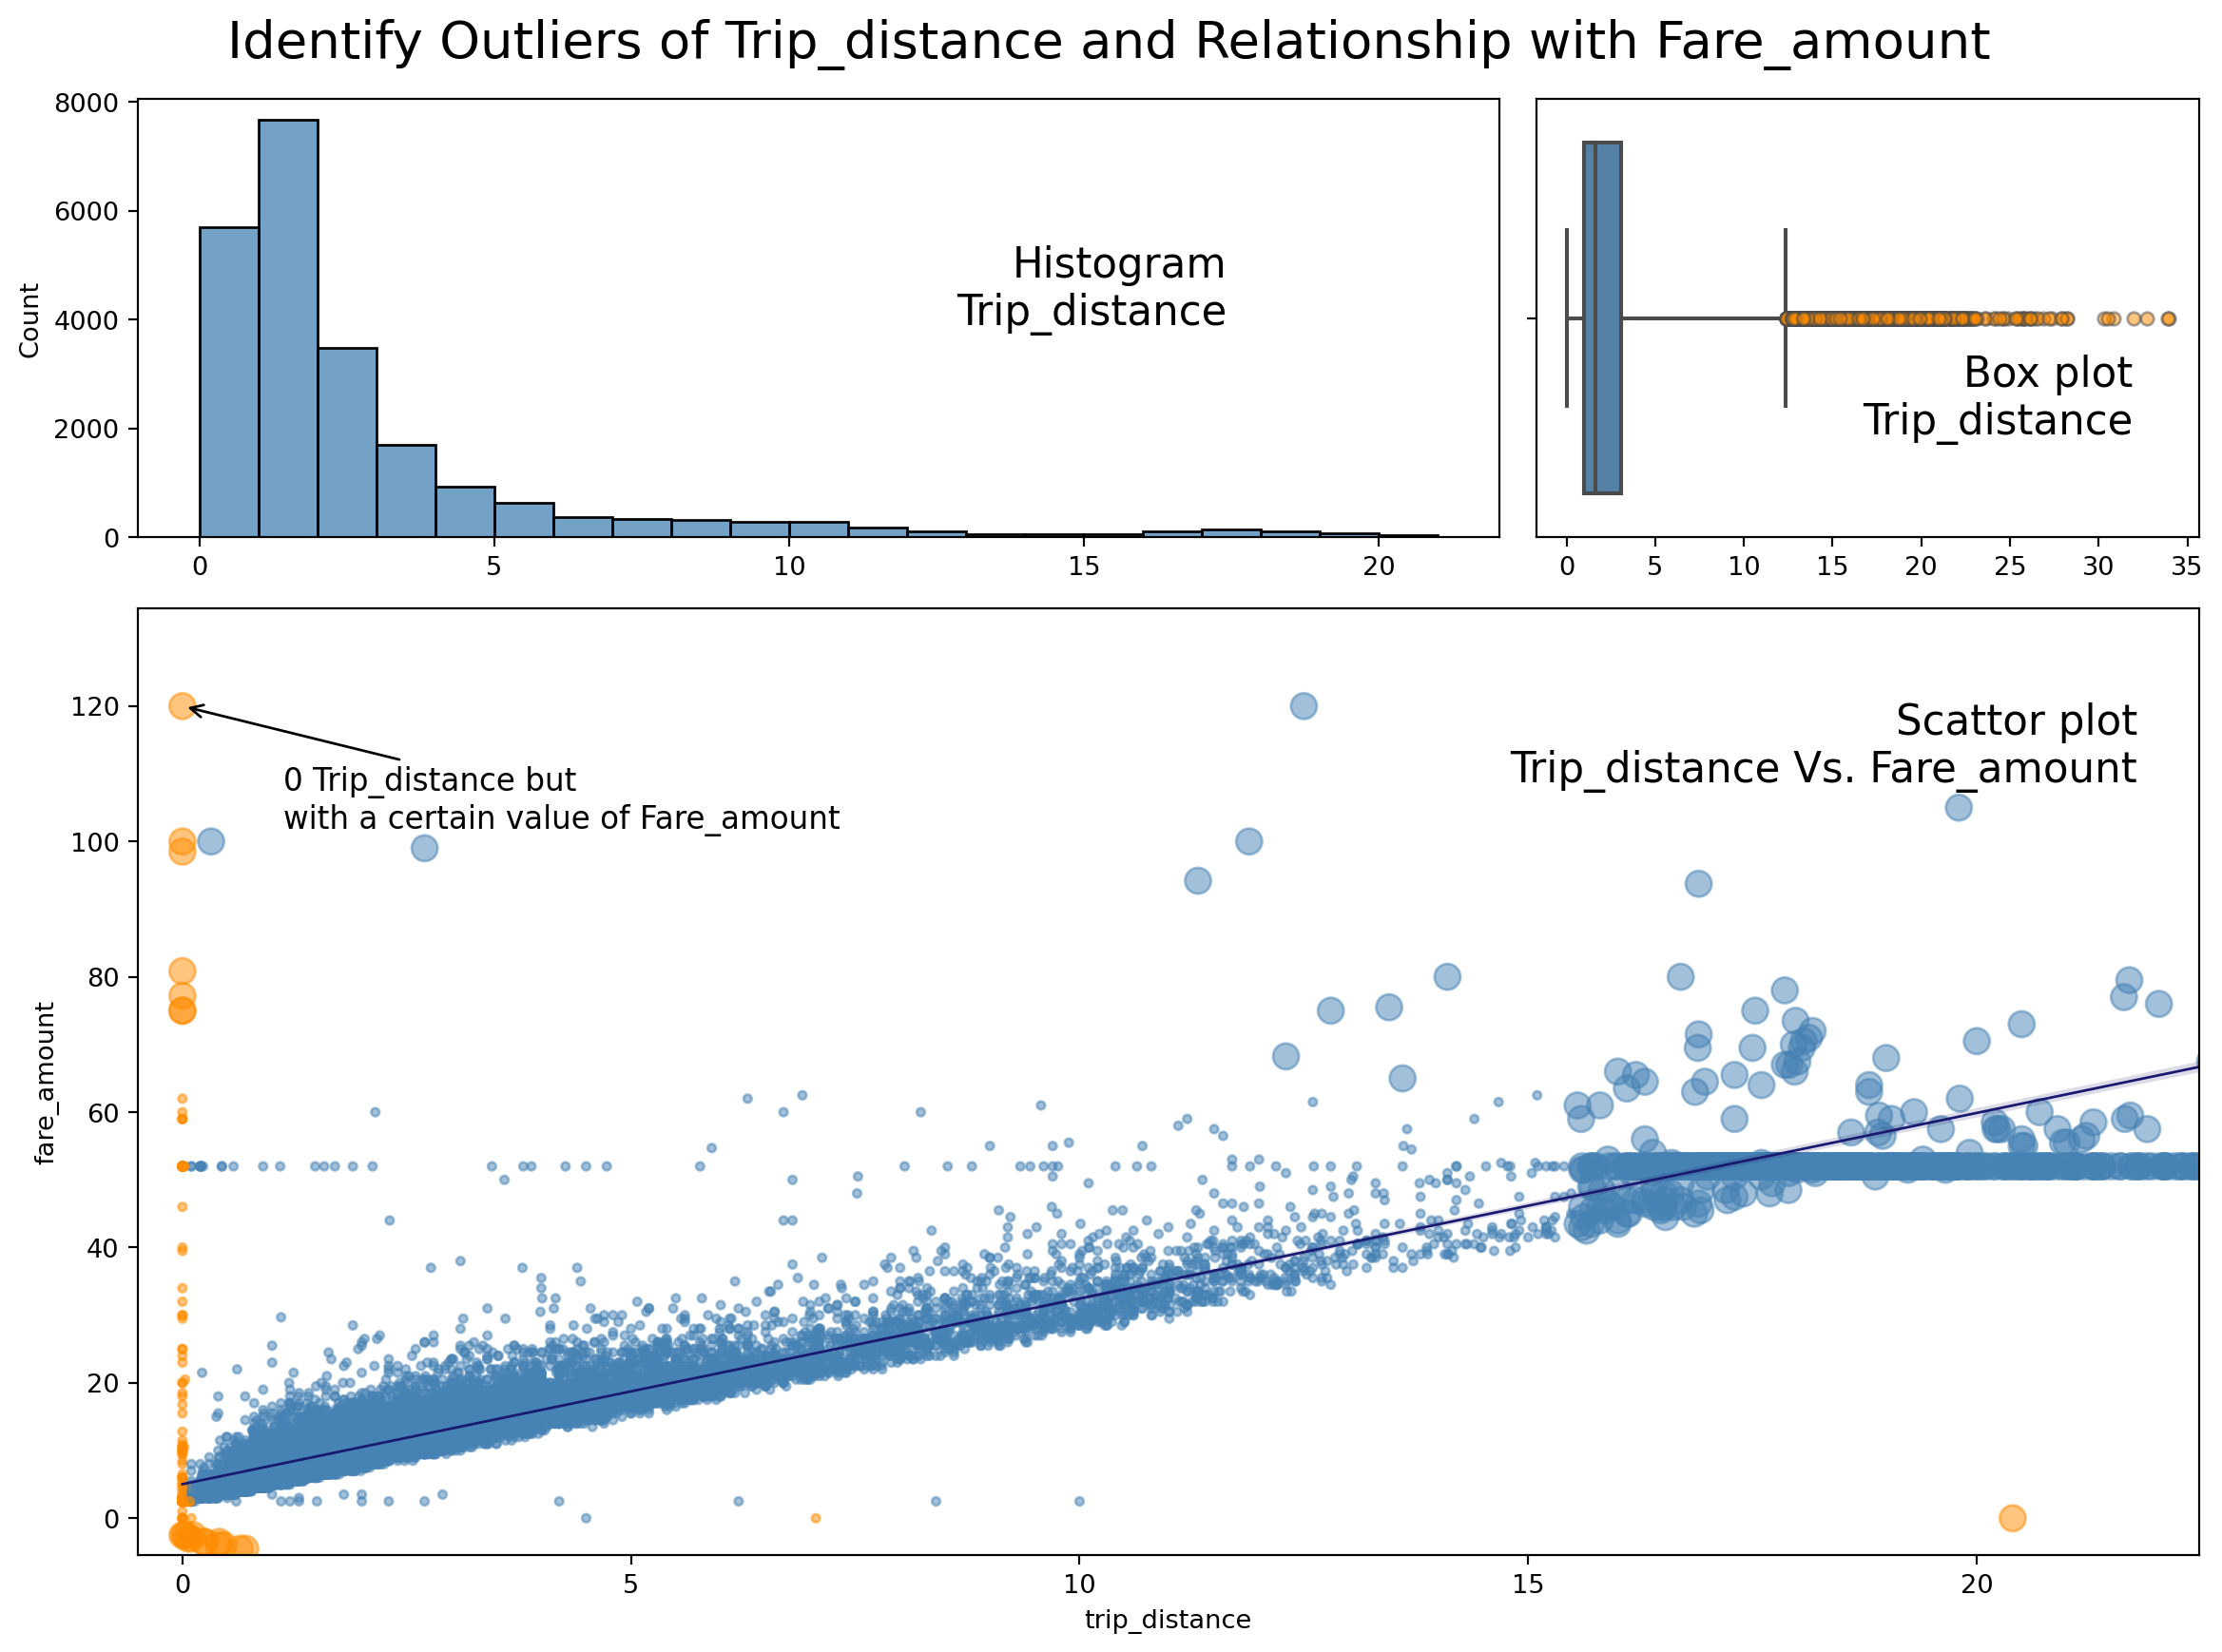

----------------------------duration----------------------------


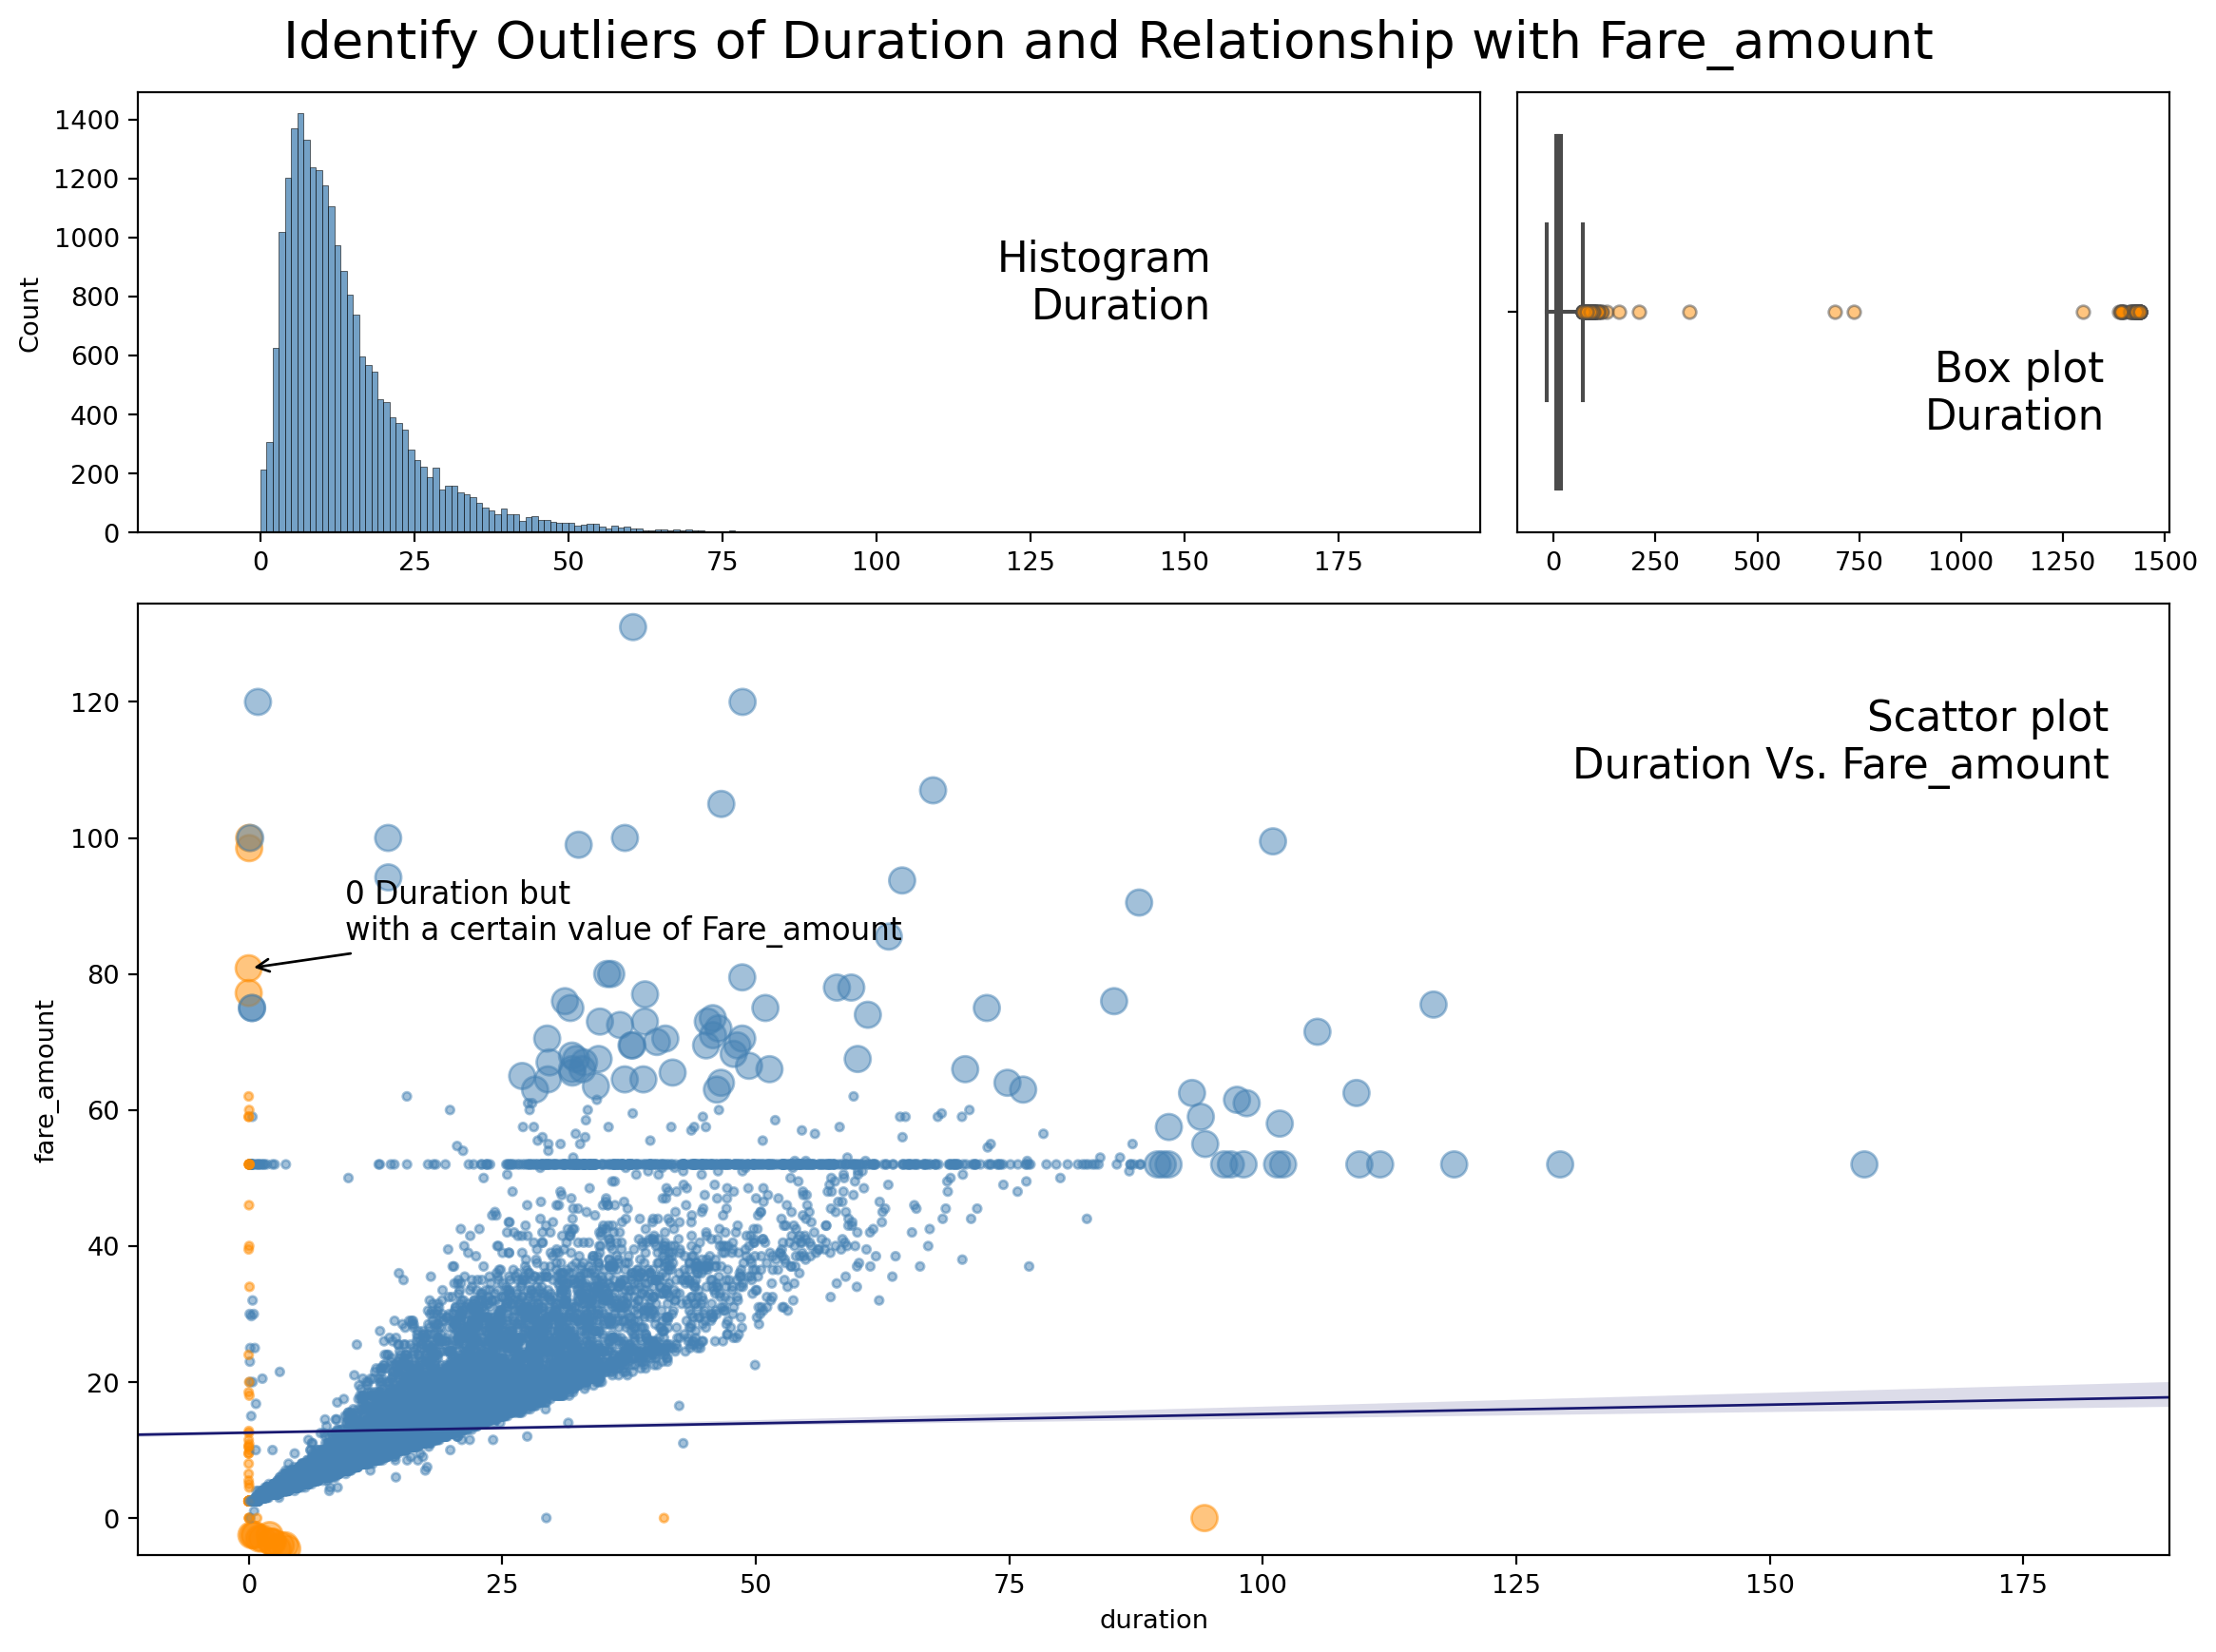

--------------------------fare_amount---------------------------


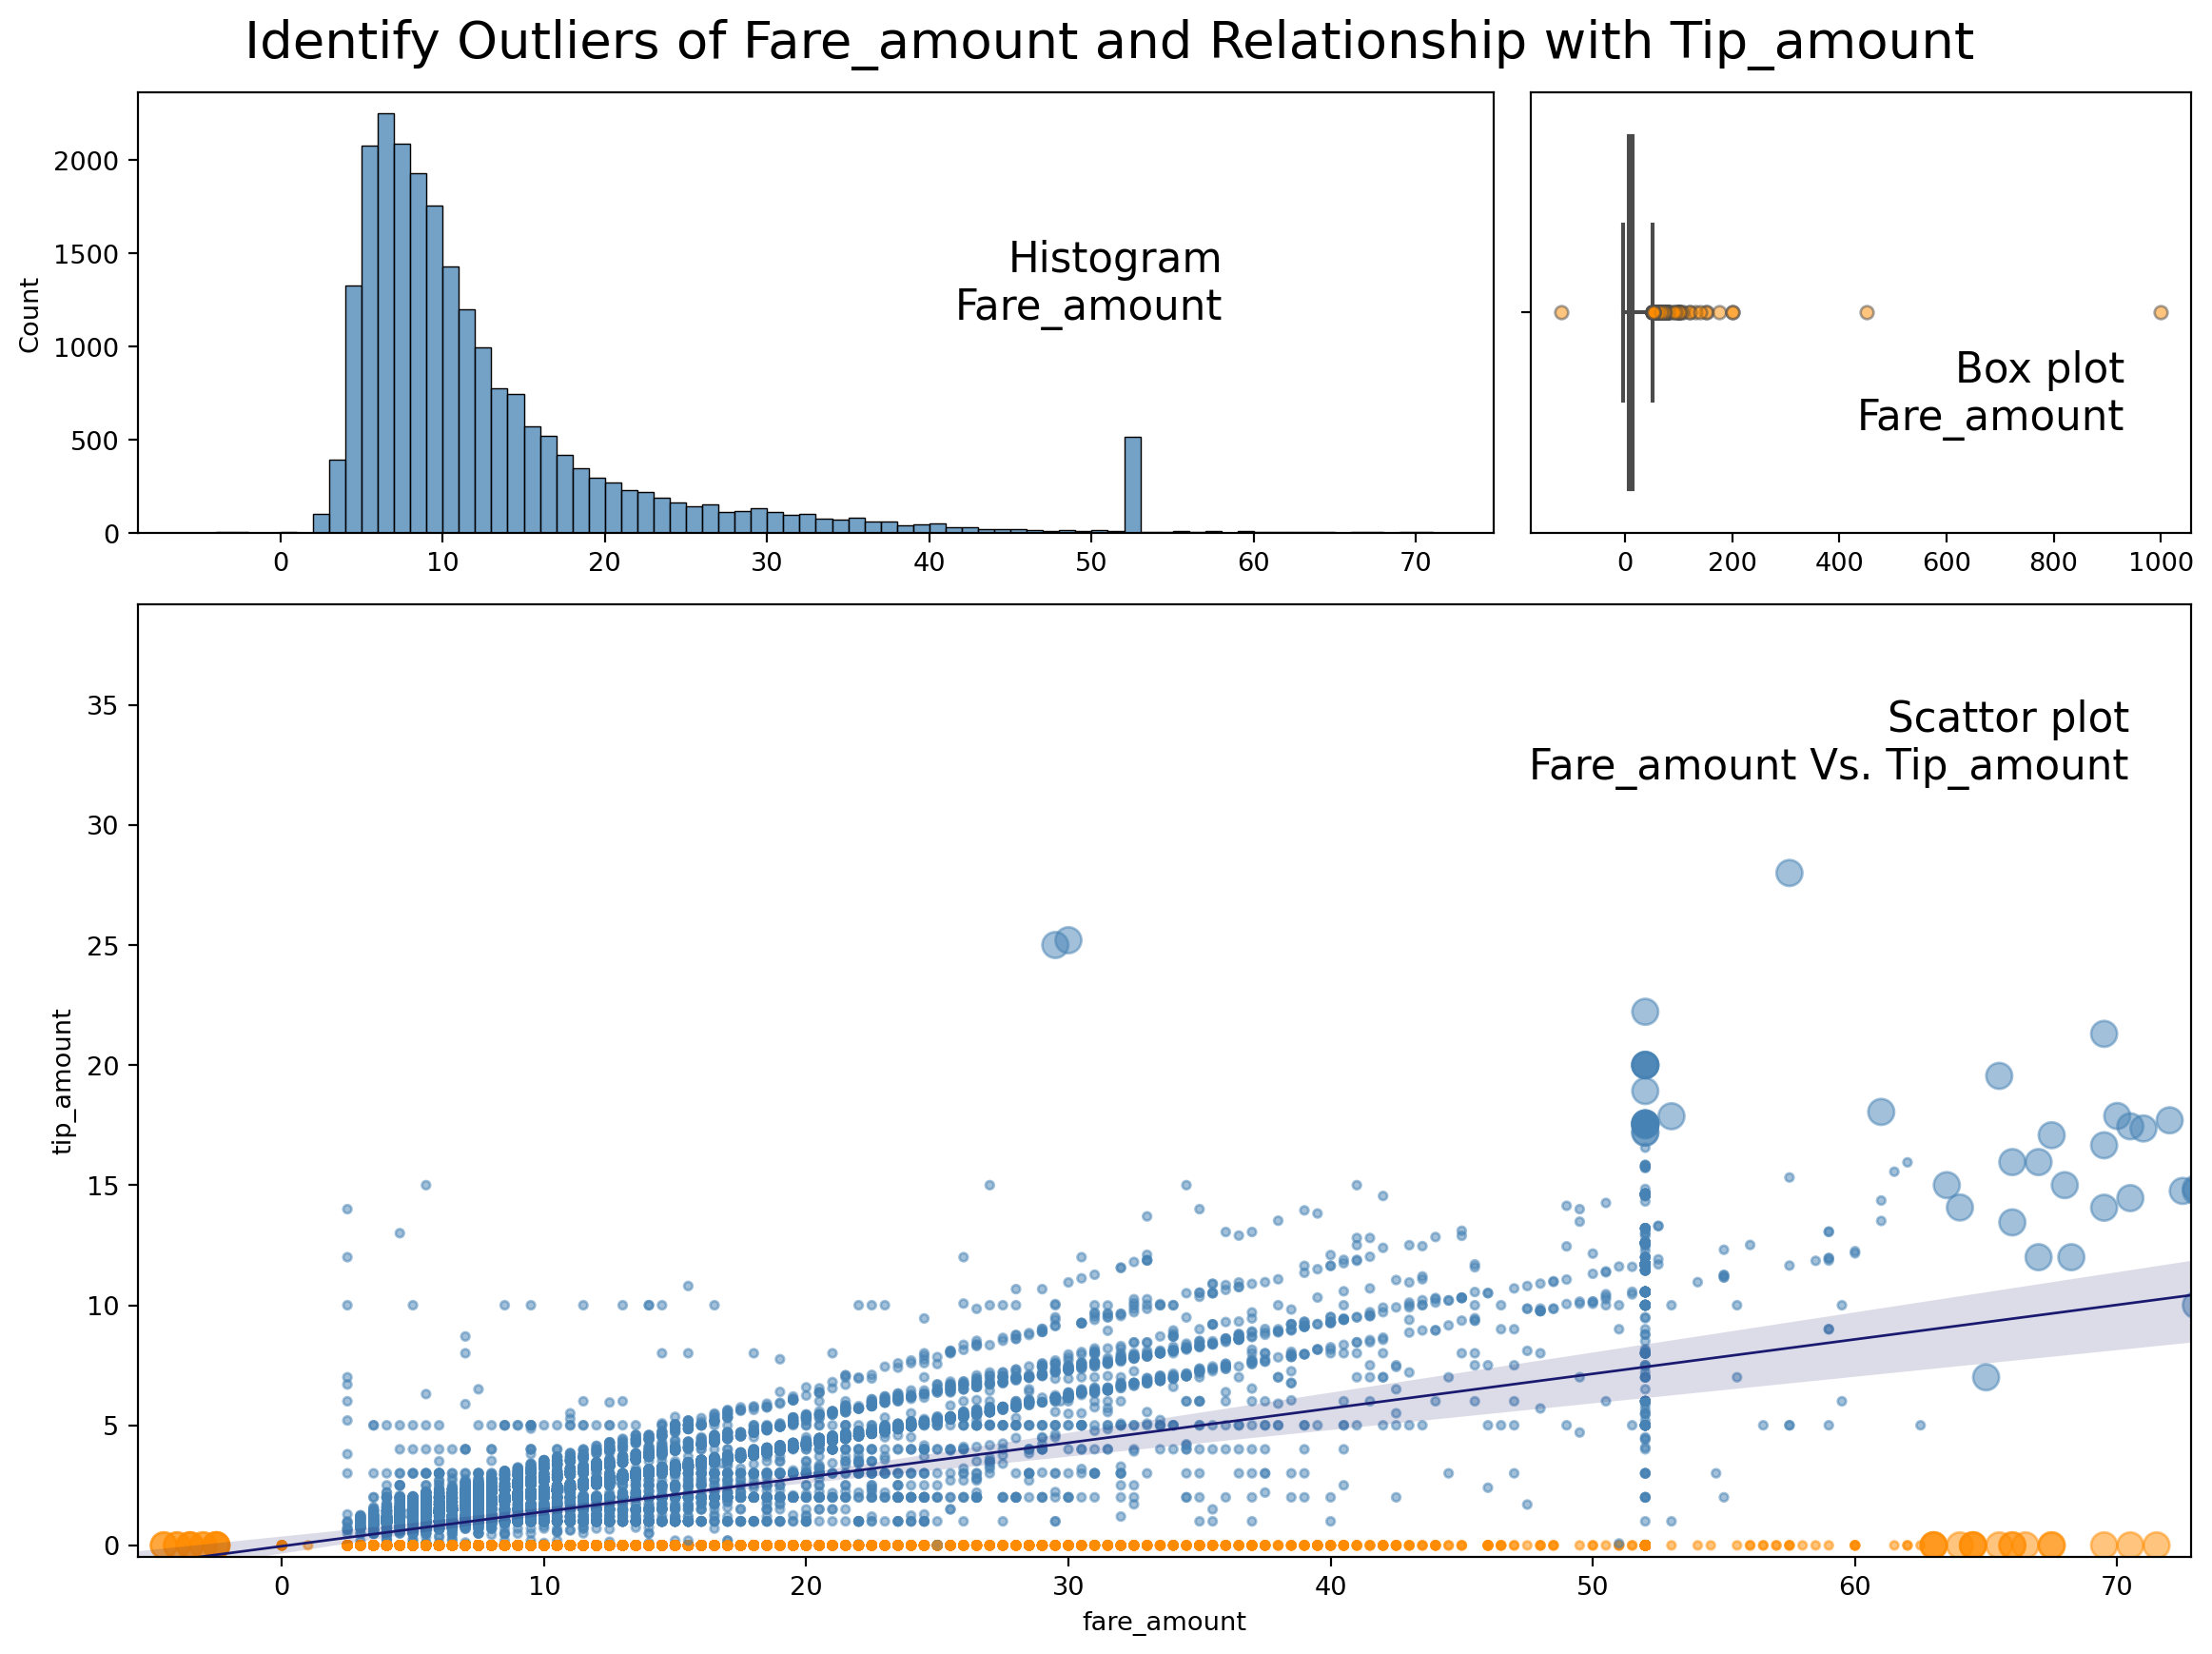

In [9]:
# Automaticly check relationship between continuous variables with target variable
xy_dict = {'fare_amount':['trip_distance', 'duration'],
           'tip_amount':['fare_amount']}

for y in xy_dict.keys():
    y_val = df[y]
    x_list = xy_dict[y]
    for x in x_list:
        x_val = df[x]
        print('{:-^64s}'.format(x)) 
    
        # Identify outliers of x and relationship between x & y 
        x_stats = x_val.describe()
        y_stats = y_val.describe()
        
        # Caculate suitable limits for both axes
        iqr_x = x_stats['75%'] - x_stats['25%']
        iqr_y = y_stats['75%'] - y_stats['25%']
        # set min or 1.5IQR from Q1 as lower limit, 
        # 1.5IQR is a common factor
        l_lmt_x = max(x_stats['25%']-(iqr_x*1.5), x_stats['min']-0.5)
        l_lmt_y = max(y_stats['25%']-(iqr_y*1.5), y_stats['min']-0.5)
        # set 99.8% position or 12IQR from Q3 as upper limit, 
        # 15IQR is the max value of trip_distance from its' Q3 value
        u_lmt_x = min(x_stats['75%']+(iqr_x*15), x_val.quantile(0.998))
        u_lmt_y = y_stats['75%']+(iqr_y*15)
        
        # Identify outliers and abnormal values
        otlr = (y_val>(y_stats['75%']+(iqr_y*6))
               ) | (x_val>(x_stats['75%']+(iqr_x*6)))
        neg = (y_val<0) | (x_val<0)
        zero = (y_val==0) | ((-0.1<x_val) & (x_val<0.1))
        size = [100 if b==True else 10 for b in (otlr|neg)]
        color = ['darkorange' if b==True 
                 else 'steelblue' for b in (zero|neg)]
        
        #Figure layout setup
        fig = plt.figure(figsize=(12,9), dpi=196)
        ax1 = plt.subplot2grid((3,3),(0,0), colspan=2)
        ax2 = plt.subplot2grid((3,3),(0,2), colspan=1)
        ax3 = plt.subplot2grid((3,3),(1,0), colspan=3, rowspan=2)
        
        # Plot a histogram for x_val at ax1
        fig1 = sns.histplot(data=None, x=x_val, 
                            bins=range(int(l_lmt_x),int(u_lmt_x)), # set the x-axis limits
                            color='steelblue',
                            ax=ax1) # layout location
        fig1.set_xlabel(None)
        fig1.set_title('Histogram\n{}'.format(x_val.name.capitalize()),
                       fontsize=16,
                       y=0.45, x=0.8, ha='right') # title location
        
        # Plot a box plot for x_val at ax2
        fig2 = sns.boxplot(data=None, x=x_val, whis=4.5, 
                           flierprops=dict(marker='o', 
                                           markerfacecolor='darkorange',
                                           linewidth=0,alpha=0.5),
                           color='steelblue',
                           ax=ax2) # layout location
        fig2.set_xlabel(None)
        fig2.set_title('Box plot\n{}'.format(x_val.name.capitalize()),fontsize=16,
                  y=0.2, x=0.9, ha='right') # title location
        
        # Plot scatter of x_val and y_val at ax3
        fig3 = sns.regplot(data=df, x=x_val, y=y_val, 
                           ci=95, scatter=True,
                           scatter_kws={'s': size, # enlarge outliers
                                        'color': color, # highlight with color
                                        'alpha': 0.5}, 
                           line_kws={'color': 'midnightblue',
                                     'linewidth': 1},                   
                           ax=ax3) # layout location
        fig3.set_xlim(l_lmt_x, u_lmt_x)
        fig3.set_ylim(l_lmt_y, u_lmt_y)
        fig3.set_title('Scattor plot\n{} Vs. {}'.format(
                       x_val.name.capitalize(),
                       y_val.name.capitalize()), fontsize=16,
                       y=0.8, x=0.97, ha='right') # title location
        annotate = '0 {} but \nwith a certain value of {} '.format(
                      x_val.name.capitalize(), y_val.name.capitalize())
        if y_val[(x_val==0)&(y_val<u_lmt_y)].max()>0:
            fig3.annotate(annotate, fontsize=12,
                          xy=(0, y_val[(x_val==0)&(y_val<u_lmt_y)
                              ].max()), # arrow positoin
                          xytext=(u_lmt_x*0.05, y_val[
                                  (x_val<0.1)&(y_val<u_lmt_y)
                                  ].max()*0.85), # annotate positoin
                          arrowprops=dict(arrowstyle='->',
                                          facecolor='black'))
        
        # Set title and layout
        title = 'Identify Outliers of {} and Relationship with {}'.format(
                     x_val.name.capitalize(), y_val.name.capitalize())
        fig.suptitle(title, fontsize=20)
        fig.tight_layout()
        plt.show()
        fig.savefig('EDA/x-{}y-{}.png'.format(
            x_val.name.capitalize(), y_val.name.capitalize()))
        plt.close()

In [10]:
# check the  the horizontal lines around fare amounts of 52
print(df[df['fare_amount'] > 50]['fare_amount'].value_counts().head())

#df[df['fare_amount']==52].head(10)

print()
print('There are {} records with fare amount equal to $52'.format(
    df['fare_amount'].value_counts()[52.0]))
print('Among them, {} have LocationID=132'.format(
    df['fare_amount'][(df['fare_amount']==52) & (
           (df['PULocationID']==132) | (df['DOLocationID']==132)
          )].value_counts().values))
print('and {} have tolls fee'.format(
    df['fare_amount'][(df['fare_amount']==52) & (
           df['tolls_amount']>0)].value_counts().values))

fare_amount
52.0    514
59.0      9
50.5      9
57.5      8
51.0      7
Name: count, dtype: int64

There are 514 records with fare amount equal to $52
Among them, [459] have LocationID=132
and [393] have tolls fee


> outlier的数据点都特意画的比较大，很不合理的数据用黄色高亮。
>
> **路程 trip_distance**
> * 路程的数值范围落在0~34英里之间。虽然Q3值只有3英里，但是纽约从长岛到麦哈顿之间的直线距离就有30英里，所以34英里的最大路程不算是离谱。对路程数值应无需做调整。  
> * 能很清晰的看到，路程与车费之间有很强的线性关系。
> * 在路程为0时，仍有许多价格不等车费产生（黄色高亮点）。
> 
> **耗时 duration**
>
> **小费 tip_amount**
>
> **车费 fare_amount**
> * 能看到车费在50~60之间形成一条了水平线。
> * 筛选出来发现这条线对应的是\$52，出发或到达地点为132，大部分都有高速费，RateCodeID=2。根据这些信息推测这些记录都是往返于JFK机场的
> * 搜索新闻，查到纽约出租车2017年去JFK机场统一计价\$52。
> * 所以这部分数据要单独考虑

### 以时间做分类 time-based hierarchical aggregation
* 有日期变量后，可以考虑按月、周天、工作日/节假日、繁忙时段等方式分类
* 看看不同分类方法下的数据分布、打车费和小费有没有明显不同

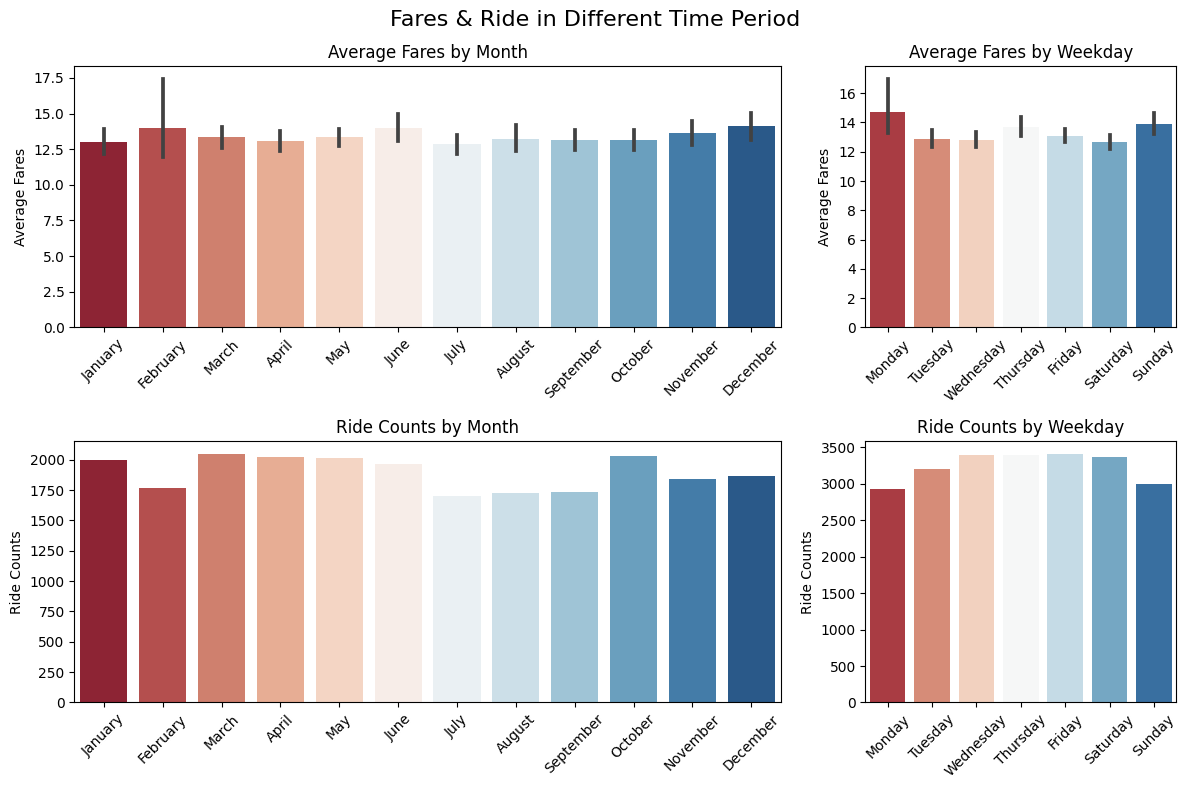

In [11]:
date_col = 'tpep_pickup_datetime'
y_var = 'fare_amount'
title_mean = 'Fares'
title_count = 'Ride'

# Create a time-based hierarchical aggregation
agg = df.groupby([df[date_col].dt.month, df[date_col].dt.month_name(),
                  df[date_col].dt.weekday, df[date_col].dt.day_name(),
                  df[date_col].dt.hour]
                )[y_var].agg(['mean', 'count'])

mon = agg.index.get_level_values(1) # month label
wd = agg.index.get_level_values(3) # weekday label
h = agg.index.get_level_values(4) # hour label

# Draw figures
fig = plt.figure(figsize=(12,8), dpi=100)
palette = 'RdBu' # set color palette

# Plot average fares for each month at left top
ax1 = plt.subplot2grid((2,3),(0,0), colspan=2)
sns.barplot(data=agg, x=mon, y=agg['mean'].values,
           palette=sns.color_palette(palette,
                                     len(mon.unique())) # set color palette
           ) 
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel('Average {}'.format(title_mean))
plt.title('Average {} by Month'.format(title_mean))

# Plot average fares for each day of week at right top
ax2 = plt.subplot2grid((2,3),(0,2), colspan=1)
sns.barplot(data=agg, x=wd, y=agg['mean'].values,
           palette=sns.color_palette(palette,
                                     len(wd.unique())) # set color palette
           ) 
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel('Average {}'.format(title_mean))
plt.title('Average {} by Weekday'.format(title_mean))

# Plot rides count for each month at left bottom
ax3 = plt.subplot2grid((2,3),(1,0), colspan=2)
sns.barplot(data=agg, x=mon, y=agg['count'].values,
            estimator=sum, errorbar=None,  # use sum value for y axis
           palette=sns.color_palette(palette,
                                     len(mon.unique())) # set color palette
           )
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel('{} Counts'.format(title_count))
plt.title('{} Counts by Month'.format(title_count))

# plot rides count for each day of week at right bottom
ax4 = plt.subplot2grid((2,3),(1,2), colspan=1)
sns.barplot(data=agg, x=wd, y=agg['count'].values,
            estimator=sum, errorbar=None,  # use sum value for y axis
           palette=sns.color_palette(palette,
                                     len(wd.unique()))  # set color palette
           )
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel('{} Counts'.format(title_count))
plt.title('{} Counts by Weekday'.format(title_count))

# Set title and layout
title = '{} & {} in Different Time Period'.format(title_mean, title_count)
fig.suptitle(title, fontsize=16)
fig.tight_layout()
plt.show()
plt.savefig('EDA/{}-{}-inDiffTimeBin.png'.format(title_mean, title_count))
plt.close()

> * 打车次数和费用在不同时间段内虽然有所不同，但波动不算大
> * 没有明显看出时间段对要预测的值有特殊的影响

## 分类变量 Category variables

看看不同分类下的数据分布、车费和小费有没有明显不同
* VendorID
* passenger_count
* RatecodeID
* store_and_fwd_flag
* PULocationID
* DOLocationID
* payment_type

----------------------------VendorID----------------------------
VendorID有2个分类，以数字区分 
每个分类下的数据量基本平均



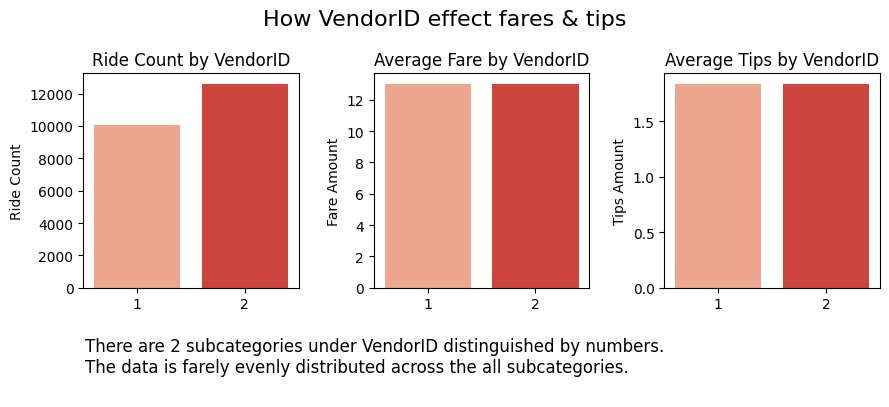

------------------------passenger_count-------------------------
passenger_count有7个分类，以数字区分 
每个分类下的数据量很不均匀



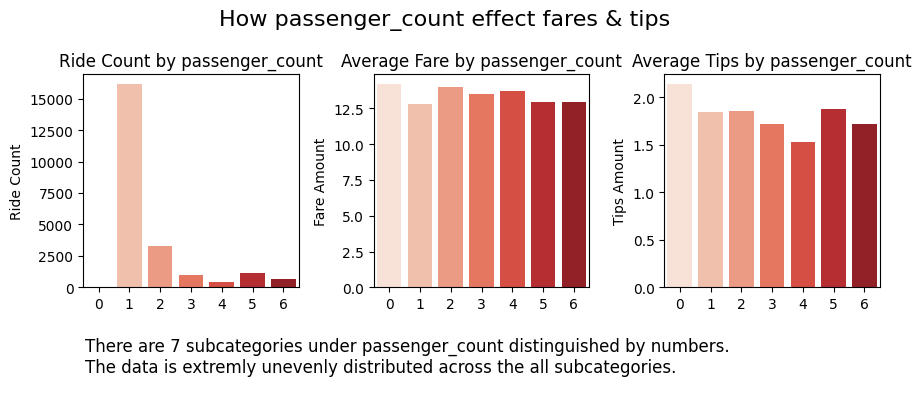

---------------------------RatecodeID---------------------------
RatecodeID有6个分类，以数字区分 
每个分类下的数据量很不均匀



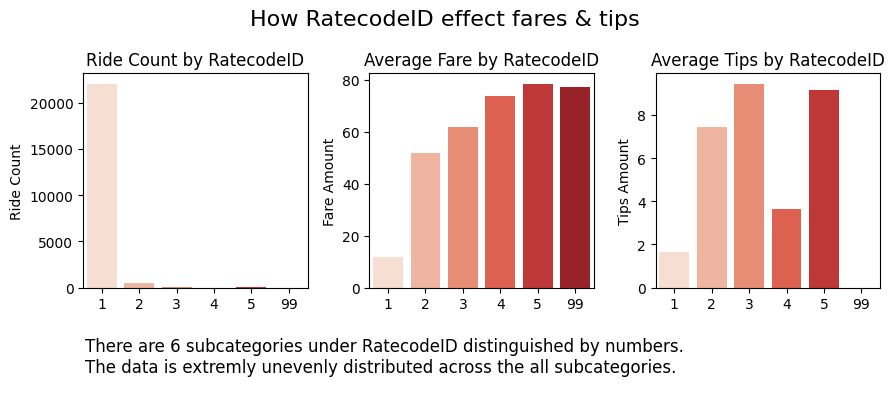

-----------------------store_and_fwd_flag-----------------------
store_and_fwd_flag有2个分类，以数字区分 
每个分类下的数据量很不均匀



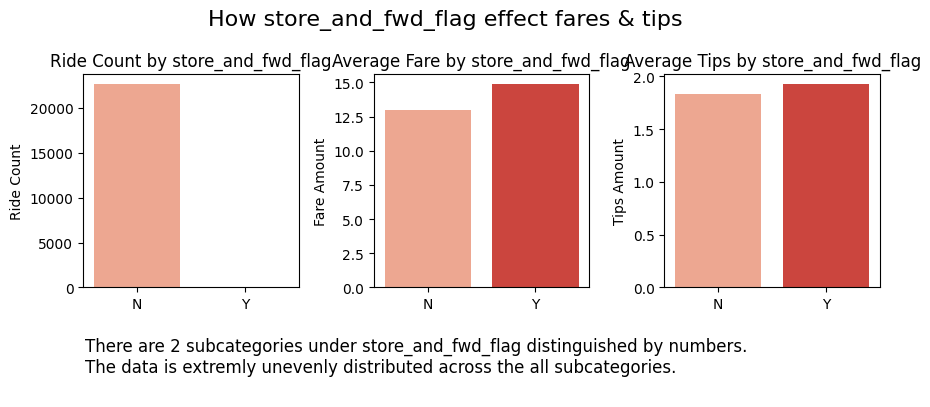

--------------------------PULocationID--------------------------
PULocationID有152个分类，以数字区分 
每个分类下的数据量很不均匀



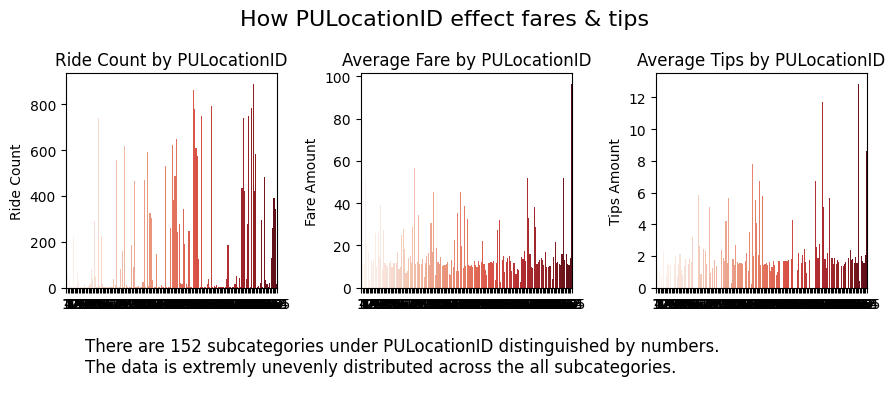

--------------------------DOLocationID--------------------------
DOLocationID有216个分类，以数字区分 
每个分类下的数据量很不均匀



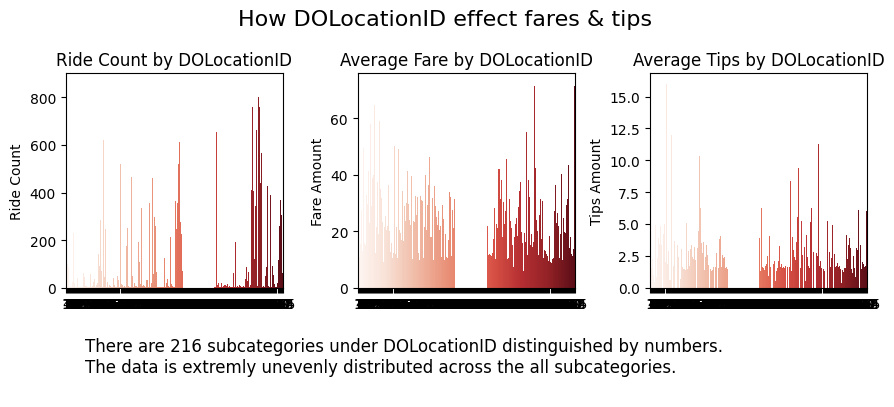

--------------------------payment_type--------------------------
payment_type有4个分类，以数字区分 
每个分类下的数据量很不均匀



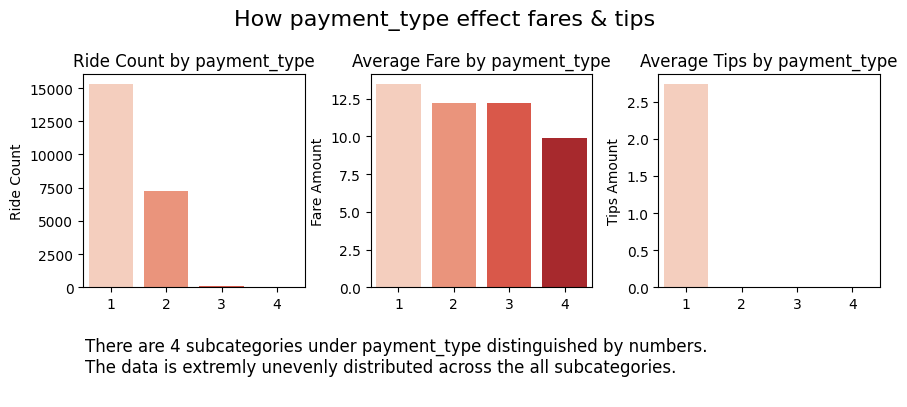

In [12]:
# Automatically check impact of each category variable on target variable
c_val_list = ['VendorID', 
              'passenger_count', 
              'RatecodeID',
              'store_and_fwd_flag',
              'PULocationID',
              'DOLocationID',
              'payment_type']
y_val = 'fare_amount'

for cat in c_val_list:
    print('{:-^64s}'.format(cat)) 
    
    # Check data distribution among subcategories
    col_name = cat
    cat_counts = df[col_name].value_counts()
    cat_distri = df[col_name].value_counts(normalize=True)
    cat_fare_mean = df.groupby(col_name)['fare_amount'].mean()
    cat_tip_mean = df.groupby(col_name)['tip_amount'].mean()
    
    # Set 80%/count as threshold for range of percentage 
    evenly = (cat_distri.max() - cat_distri.min())<(0.8 / len(cat_distri))
    
    # 输出分布状况
    print('{0}有{1}个分类，以数字区分 \n每个分类下的数据量{2}'.format(
        col_name, 
        len(cat_counts),
        '基本平均' if evenly else '很不均匀'))
    print()
    
    # Conclusion on distribution among subcategories
    conclu = ['There are {1} subcategories under {0} distinguished by numbers.\
    \nThe data is {2} distributed across the all subcategories.\n'.format(
                col_name,
                len(cat_counts),
                'farely evenly' if evenly else 'extremly unevenly')]
            
    # Figure setup
    fig = plt.figure(figsize=(9,4), dpi=100)
    palet= sns.color_palette('Reds',len(cat_counts)) # set color palette
    
    # Plot ride count for each category(histogram)
    plt.subplot(1, 3, 1)
    sns.barplot(x=cat_counts.index, y=cat_counts ,palette=palet) 
    plt.xlabel(None)
    plt.ylabel('Ride Count')
    plt.title('Ride Count by ' + col_name)
    
    # Plot average fares for each category(barplot)
    plt.subplot(1, 3, 2)
    sns.barplot(x=cat_fare_mean.index, y=cat_fare_mean,palette=palet)
    plt.xlabel(None)
    plt.ylabel('Fare Amount')
    plt.title('Average Fare by ' + col_name)
    
    # Plot average tips for each category(barplot)
    plt.subplot(1, 3, 3)
    sns.barplot(x=cat_tip_mean.index, y=cat_tip_mean,palette=palet)
    plt.xlabel(None)
    plt.ylabel('Tips Amount')
    plt.title('Average Tips by ' + col_name)
    
    # Set title and layout
    fig.suptitle('How {} effect fares & tips'.format(col_name), fontsize=16)
    fig.supxlabel('\n'.join(conclu), x=0.1, ha='left', fontsize=12)
    fig.tight_layout()
    plt.show()
    plt.savefig('EDA/x-{}-y-{}.png'.format(col_name, y_val))
    plt.close()

## 分类变量假设检验 Hypothesis Test on C(Variables)

## 处理问题数据 Data validation
dropping rows
Substituting extreme data

### 放弃部分数据 dropping rows
* 出现负数的数据总计15条，观察后发现负数车费的情况不合理
* duration选择*-1写回，其余写0

In [13]:
# negative values
neg_fare = df['fare_amount']<0
neg_total = df['total_amount']<0
neg_duration = df['duration']<0
df[(neg_fare|neg_total|neg_duration)].head(15)

# neg_duration convert to positive number
df.loc[df['duration']<0, 'duration'] = -df['duration'].loc[df['duration']<0]

# drop all other record with negative values
df.loc[neg_fare,'fare_amount'] = 0
df.loc[neg_total, 'total_amount'] = 0 
df[(neg_fare|neg_total|neg_duration)].head(15)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
314     105454287         2  2017-12-13 02:02:39   2017-12-13 02:03:08   
1646     57337183         2  2017-07-05 11:02:23   2017-07-05 11:03:00   
4423     97329905         2  2017-11-16 20:13:30   2017-11-16 20:14:50   
5448     28459983         2  2017-04-06 12:50:26   2017-04-06 12:52:39   
5758       833948         2  2017-01-03 20:15:23   2017-01-03 20:15:39   
8204     91187947         2  2017-10-28 20:39:36   2017-10-28 20:41:59   
9356     93542707         1  2017-11-05 01:23:08   2017-11-05 01:06:09   
10281    55302347         2  2017-06-05 17:34:25   2017-06-05 17:36:29   
11204    58395501         2  2017-07-09 07:20:59   2017-07-09 07:23:50   
12944    29059760         2  2017-04-08 00:00:16   2017-04-08 23:15:57   
14714   109276092         2  2017-12-24 22:37:58   2017-12-24 22:41:08   
17602    24690146         2  2017-03-24 19:31:13   2017-03-24 19:34:49   
18565    43859760         2  2017-05-22 15:51:20   2017-05-22 15:52:22   
20317    75926915         2  2017-09-09 22:59:51   2017-09-09 23:02:06   
20698    14668209         2  2017-02-24 00:38:17   2017-02-24 00:42:05   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
314                  6           0.12           1                  N   
1646                 1           0.04           1                  N   
4423                 2           0.06           1                  N   
5448                 1           0.25           1                  N   
5758                 1           0.02           1                  N   
8204                 1           0.41           1                  N   
9356                 1           5.70           1                  N   
10281                2           0.00           1                  N   
11204                1           0.64           1                  N   
12944                1           0.17           5                  N   
14714                5           0.40           1                  N   
17602                1           0.46           1                  N   
18565                1           0.10           1                  N   
20317                1           0.24           1                  N   
20698                1           0.70           1                  N   

       PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
314             161           161             3          0.0   -0.5     -0.5   
1646             79            79             3          0.0    0.0     -0.5   
4423            237           237             4          0.0   -0.5     -0.5   
5448             90            68             3          0.0    0.0     -0.5   
5758            170           170             3          0.0   -0.5     -0.5   
8204            236           237             3          0.0   -0.5     -0.5   
9356            161           157             3         28.0    0.5      0.5   
10281           238           238             4          0.0   -1.0     -0.5   
11204            50            48             3          0.0    0.0     -0.5   
12944           138           138             4          0.0    0.0      0.0   
14714           164           161             4          0.0   -0.5     -0.5   
17602            87            45             4          0.0   -1.0     -0.5   
18565           230           163             3          0.0    0.0     -0.5   
20317           116           116             4          0.0   -0.5     -0.5   
20698            65            25             4          0.0   -0.5     -0.5   

       tip_amount  tolls_amount  improvement_surcharge  total_amount  \
314           0.0           0.0                   -0.3           0.0   
1646          0.0           0.0                   -0.3           0.0   
4423          0.0           0.0                   -0.3           0.0   
5448          0.0           0.0                   -0.3           0.0   
5758          0.0           

### 替换数值 Substituting extreme data
* 车程的最大值大约是IQR的15倍
* 所以决定用1/2数值7.5IQR作为车费的上限，改写所有车费outlier
* 用15IQR作为duration上限，改写所有耗时outlier

In [14]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [15]:
# Impute the maximum value as Q3+(7.5*IQR) for fares
outlier_imputer(['fare_amount'], 7.5)

# Impute the maximum value as Q3+(15*IQR) for duration
outlier_imputer(['duration'], 6.5)

fare_amount
q3: 14.5
upper_threshold: 74.5
count    22699.000000
mean        12.929445
std         10.704018
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         74.500000
Name: fare_amount, dtype: float64

duration
q3: 18.383333333333333
upper_threshold: 94.65
count    22699.000000
mean        14.478748
std         12.058871
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         94.650000
Name: duration, dtype: float64



# 转换构建新变量 Feature engineering
已经构建的变量：duration, rush_hour

虽然车程与耗时和车费非常相关，然而这两个数据都是不能在乘车前获得的。作为训练回归模型的变量就没有意义。为了解决这个悖论，考虑将出发和到达地点合并作为一个标准，用历史数据为每组地点计算出路程和耗时平均值，已这两组均值作为可获取的已知数据作为变量来训练回归模型。训练出来的模型将可以依托历史数据预测未知旅程。

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you do know to generalize about ones you do not know. In this step, create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropoff points. Then, repeat the process used to create the mean_distance column to create a mean_duration column.

* 合并两个地址，注意A到B和B到A是不同的地点组
* 以新地点组为基准，算出每组地点的平均路程和平均耗时
* 为了更严谨，应该在数据拆分成训练组和测试组后，只以训练组数据计算这两种均值，同时在测试时也使用训练组的均值

In [16]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df[['PULocationID','DOLocationID','pickup_dropoff']] .head()

PULocationID  DOLocationID pickup_dropoff
0           100           231        100 231
1           186            43         186 43
2           262           236        262 236
3           188            97         188 97
4             4           112          4 112

In [17]:
# Create 'mean_distance' column
# 0. Caculate mean value and save the result as 'grouoped' 
grouped = df.groupby('pickup_dropoff')['trip_distance'].mean(numeric_only=True)
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']
# 3. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Create 'mean_duration' column
# 0. Caculate mean value and save the result as 'grouoped'
grouped = df.groupby('pickup_dropoff')['duration'].mean(numeric_only=True)
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Create a mean_duration column that is a copy of the pickup_dropoff helper column
df['mean_duration'] = df['pickup_dropoff']
# 3. Map `grouped_dict` to the `mean_duration` column
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance','mean_duration']]

mean_distance  mean_duration
0           3.521667      22.847222
4909        3.521667      22.847222
16636       3.521667      22.847222
18134       3.521667      22.847222
19761       3.521667      22.847222
20581       3.521667      22.847222

# **<font color=#ffbc32>Construct</font> Stage**
# 主任务：回归模型 Task1: Regression Model

## Isolate modeling variables & data
* 不是自变量的，不带入
* 看不出对y值有影响的，不带入
* 假设检验中H0被拒绝的，不带入
* 被用来生成新Feature的，不带入

In [18]:
df2 = df.copy()
# Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   rush_hour        22699 non-null  int64  
 4   mean_distance    22699 non-null  float64
 5   mean_duration    22699 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


## Identify correlations
* Pair plot variables
* Code and visualize a correlation heatmap

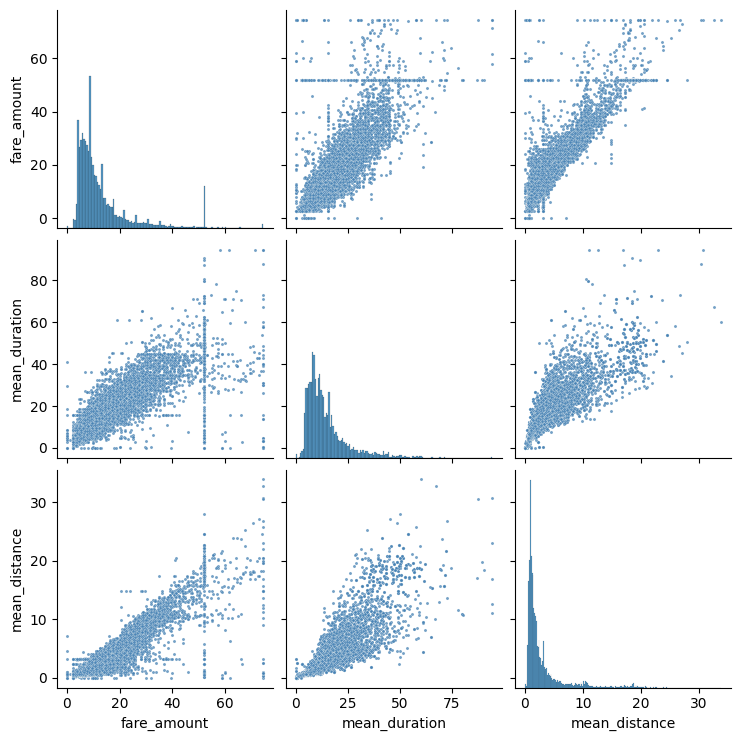

In [19]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
            plot_kws={'alpha':0.75, 's':5, 'color':'steelblue'})

In [20]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
correlation = df2.corr(method='pearson')
correlation

VendorID  passenger_count  fare_amount  rush_hour  \
VendorID         1.000000         0.266463     0.001271  -0.002874   
passenger_count  0.266463         1.000000     0.014962  -0.022035   
fare_amount      0.001271         0.014962     1.000000  -0.019877   
rush_hour       -0.002874        -0.022035    -0.019877   1.000000   
mean_distance    0.004741         0.013428     0.906505  -0.039725   
mean_duration    0.001872         0.015800     0.851424  -0.021451   

                 mean_distance  mean_duration  
VendorID              0.004741       0.001872  
passenger_count       0.013428       0.015800  
fare_amount           0.906505       0.851424  
rush_hour            -0.039725      -0.021451  
mean_distance         1.000000       0.873757  
mean_duration         0.873757       1.000000

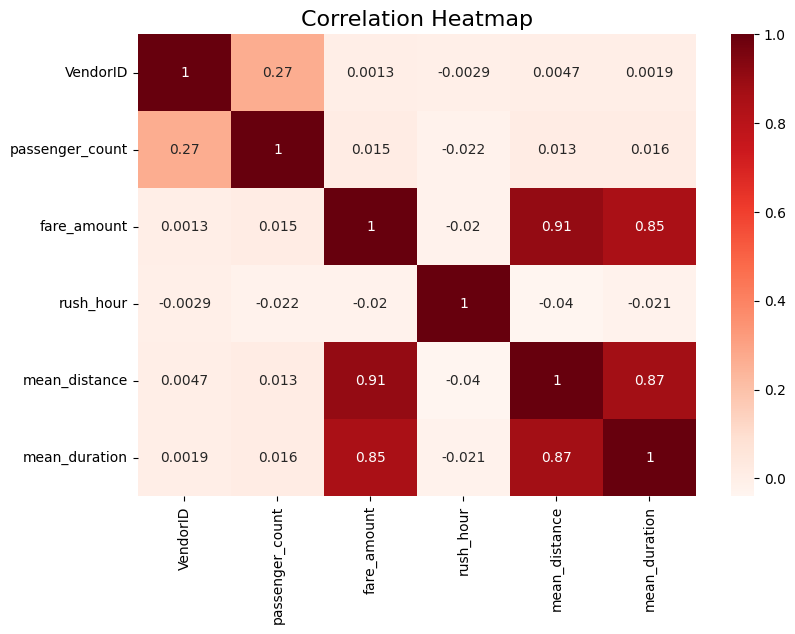

In [21]:
# Create correlation heatmap
fig = plt.figure(figsize=(9,6))
sns.heatmap(correlation, annot=True, 
            cmap='Reds')
plt.title('Correlation Heatmap',
          fontsize=16)
plt.show()
fig.savefig('EDA/heatmap.png')
plt.close()

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount`. They're also both correlated with each other, with a Pearson correlation of 0.85.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

## Construct


### 建模前的数据准备 Pre-process data
* 复制一份数据df2用来拆分训练组和测试组

In [22]:
# Set y, x variables
X = df2.drop(columns=['fare_amount'])
y = df2[['fare_amount']]
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=161)

* 往来JFK机场的行程与回归逻辑无关，不带入

In [23]:
# Drop JFK ride for train and test sets
jfk = df['RatecodeID']==2
jfk_idx = df[jfk].index
for df_splt in [X_train, X_test, y_train, y_test]:
    drop_idx = df_splt.index.intersection(jfk_idx)
    df_splt.drop(drop_idx, inplace=True)

* 用训练组数据重新计算平均车程和耗时，并把新数据写入整个df2的对应变量列中
* 由于地点组和有4000+，所以训练组不可能覆盖所有的地点组和，缺失的部分就保留用整个数据计算出的结果

In [24]:
# Recaculate 'mean_distance' & 'mean_duration'
# mean_distance
grouped_train = df.loc[X_train.index,].groupby('pickup_dropoff')['trip_distance'].mean(numeric_only=True)
grouped_all = df.groupby('pickup_dropoff')['trip_distance'].mean(numeric_only=True)
# 1. Convert `grouped` to a dictionary and update all with train
train_dict = grouped_train.to_dict()
all_dict = grouped_all.to_dict()
all_dict.update(train_dict)
# 2. Create a mean_distance column that is a copy of the pickup_dropoff helper column
X['mean_distance'] = df.loc[X.index,]['pickup_dropoff']
X_train['mean_distance'] = df.loc[X_train.index,]['pickup_dropoff']
X_test['mean_distance'] = df.loc[X_test.index,]['pickup_dropoff']
# 3. Replace `grouped_dict` to the `mean_distance` column
X['mean_distance'] = X['mean_distance'].map(all_dict)
X_train['mean_distance'] = X_train['mean_distance'].map(all_dict)
X_test['mean_distance'] = X_test['mean_distance'].map(all_dict)

# mean_duration
grouped_train = df.loc[X_train.index,].groupby('pickup_dropoff')['duration'].mean(numeric_only=True)
grouped_all = df.groupby('pickup_dropoff')['duration'].mean(numeric_only=True)
# 1. Convert `grouped` to a dictionary
train_dict = grouped_train.to_dict()
all_dict = grouped_all.to_dict()
all_dict.update(train_dict)
# 2. Create a mean_distance column that is a copy of the pickup_dropoff helper column
X['mean_duration'] = df.loc[X.index,]['pickup_dropoff']
X_train['mean_duration'] = df.loc[X_train.index,]['pickup_dropoff']
X_test['mean_duration'] = df.loc[X_test.index,]['pickup_dropoff']
# 3. Replace `grouped_dict` to the `mean_distance` column
X['mean_duration'] = X['mean_duration'].map(all_dict)
X_train['mean_duration'] = X_train['mean_duration'].map(all_dict)
X_test['mean_duration'] = X_test['mean_duration'].map(all_dict)

* 对X进行数据标准化放缩

In [25]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-1.11780741 -0.49959513  1.5346397  -0.69899608 -0.97226077]
 [-1.11780741 -0.49959513 -0.65161875 -0.21467866 -0.31051725]
 [ 0.89460849 -0.49959513 -0.65161875  0.67483646  1.49047513]
 ...
 [-1.11780741 -0.49959513  1.5346397  -0.09143116  0.3369441 ]
 [ 0.89460849 -0.49959513 -0.65161875 -0.36696043 -0.57836309]
 [-1.11780741 -0.49959513  1.5346397  -0.48868426 -0.3499498 ]]


### 建模 Fit the model

In [26]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluate model


### Train data
Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [27]:
# Evaluate the model performance on the training data
print('Model performance on the training data')
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Model performance on the training data
Coefficient of determination: 0.8386287520515192
R^2: 0.8386287520515192
MAE: 1.9695023062295507
MSE: 13.057116475386605
RMSE: 3.613463224579241


### Test data
Calculate the same metrics on the test data. 

In [28]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

# Evaluate the model performance on the testing data
print('Model performance on the testing data')
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Model performance on the testing data
Coefficient of determination: 0.7788222605960049
R^2: 0.7788222605960049
MAE: 2.3121257507643826
MSE: 18.11075920933516
RMSE: 4.255673766788893


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R2 of 0.854 means that 85.4% of the variance in the fare_amount variable is described by the model.

## Results


In [29]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted  residual
1217      9.5  10.146376 -0.646376
16393    32.0  36.045353 -4.045353
15130    10.5   7.214163  3.285837
18322     4.5   5.001197 -0.501197
1632      4.0   6.631769 -2.631769

* Visualize model results

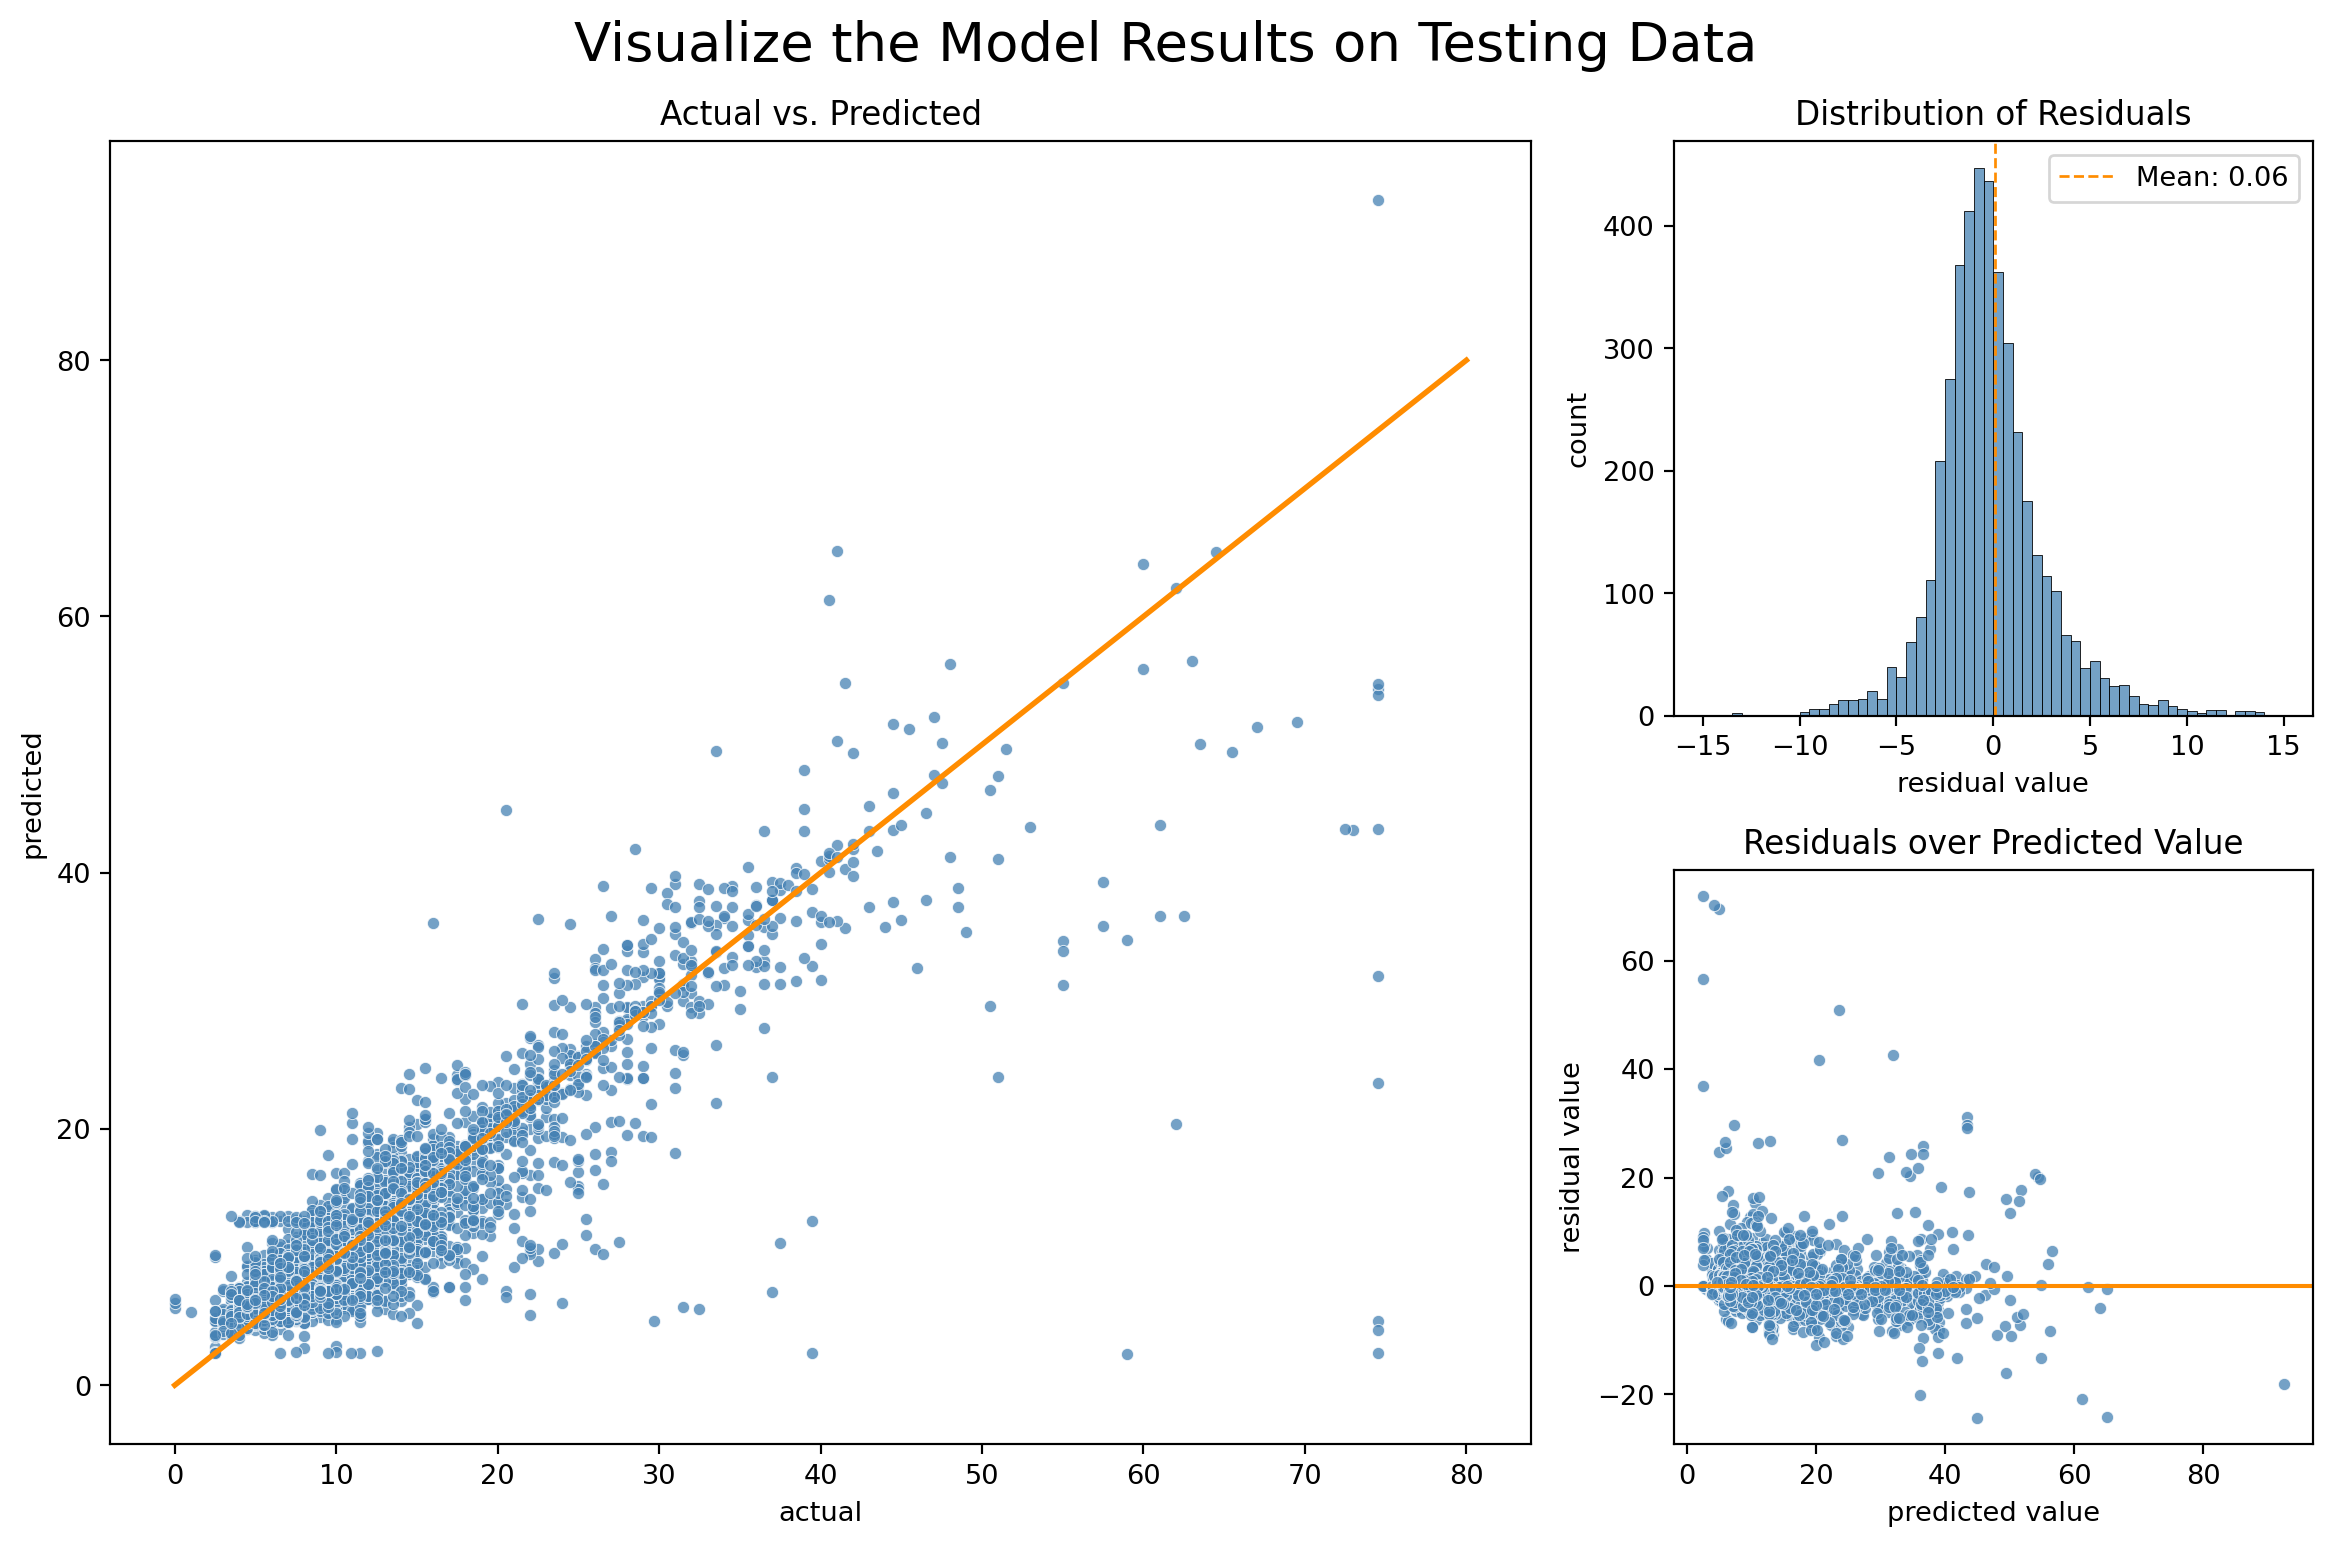

In [30]:
#Figure setup
fig = plt.figure(figsize=(12,8), dpi=196)
ax1 = plt.subplot2grid((2,3),(0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid((2,3),(0,2), colspan=1)
ax3 = plt.subplot2grid((2,3),(1,2), colspan=1)

# Create a scatterplot to visualize `predicted` over `actual`
ax1 = sns.scatterplot(data=results, x='actual', y='predicted',
                s=20, color='steelblue', alpha=0.75,
                ax=ax1)

# Draw an x=y line to show what the results would be if the model were perfect
ax1.plot([0,80], [0,80], c='darkorange', linewidth=2)
ax1.set_title('Actual vs. Predicted')

# Visualize the distribution of the `residuals`
ax2 = sns.histplot(results['residual'], 
             bins=np.arange(-15,15.5,0.5),
             color='steelblue',    
             ax=ax2)
mean_value = round(results['residual'].mean(),3)
ax2.axvline(mean_value, 
            color='darkorange', linestyle='dashed', linewidth=1, 
            label=f'Mean: {mean_value:.2f}')
ax2.legend()

ax2.set_xlabel('residual value')
ax2.set_ylabel('count')
ax2.set_title('Distribution of Residuals')

# Create a scatterplot of `residuals` over `predicted`
ax3 = sns.scatterplot(x='predicted', y='residual', data=results,
                      s=20, color='steelblue', alpha=0.75,
                      ax=ax3)
ax3.axhline(0, c='darkorange')
ax3.set_xlabel('predicted value')
ax3.set_ylabel('residual value')
ax3.set_title('Residuals over Predicted Value')

# Set title and layout
title = 'Visualize the Model Results on Testing Data'
fig.suptitle(title, fontsize=20)
fig.tight_layout()
plt.show()
fig.savefig('evaluation/model_result_on_test_data.png')
plt.close()

The distribution of the residuals is approximately normal and has a mean of 0.06. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of \\$74.50.

## Prediction
1. Get the model's predictions on the full dataset.
2. Impute the constant fare rate of $52 for all trips with rate codes of 2.
3. Check the model's performance on the full dataset.
4. Save the final predictions and mean_duration and mean_distance columns for downstream use.

In [31]:
# Predict on full dataset
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [32]:
# Impute ratecode 2 fare
final_preds = df[['RatecodeID']].copy()
final_preds['y_preds_full'] = y_preds_full
# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

RatecodeID  y_preds_full
11            2          52.0
110           2          52.0
161           2          52.0
247           2          52.0
379           2          52.0

In [33]:
# Check performance on full dataset
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8800134748104907
MAE: 1.9917681080501743
MSE: 13.746971301727637
RMSE: 3.707690831464732


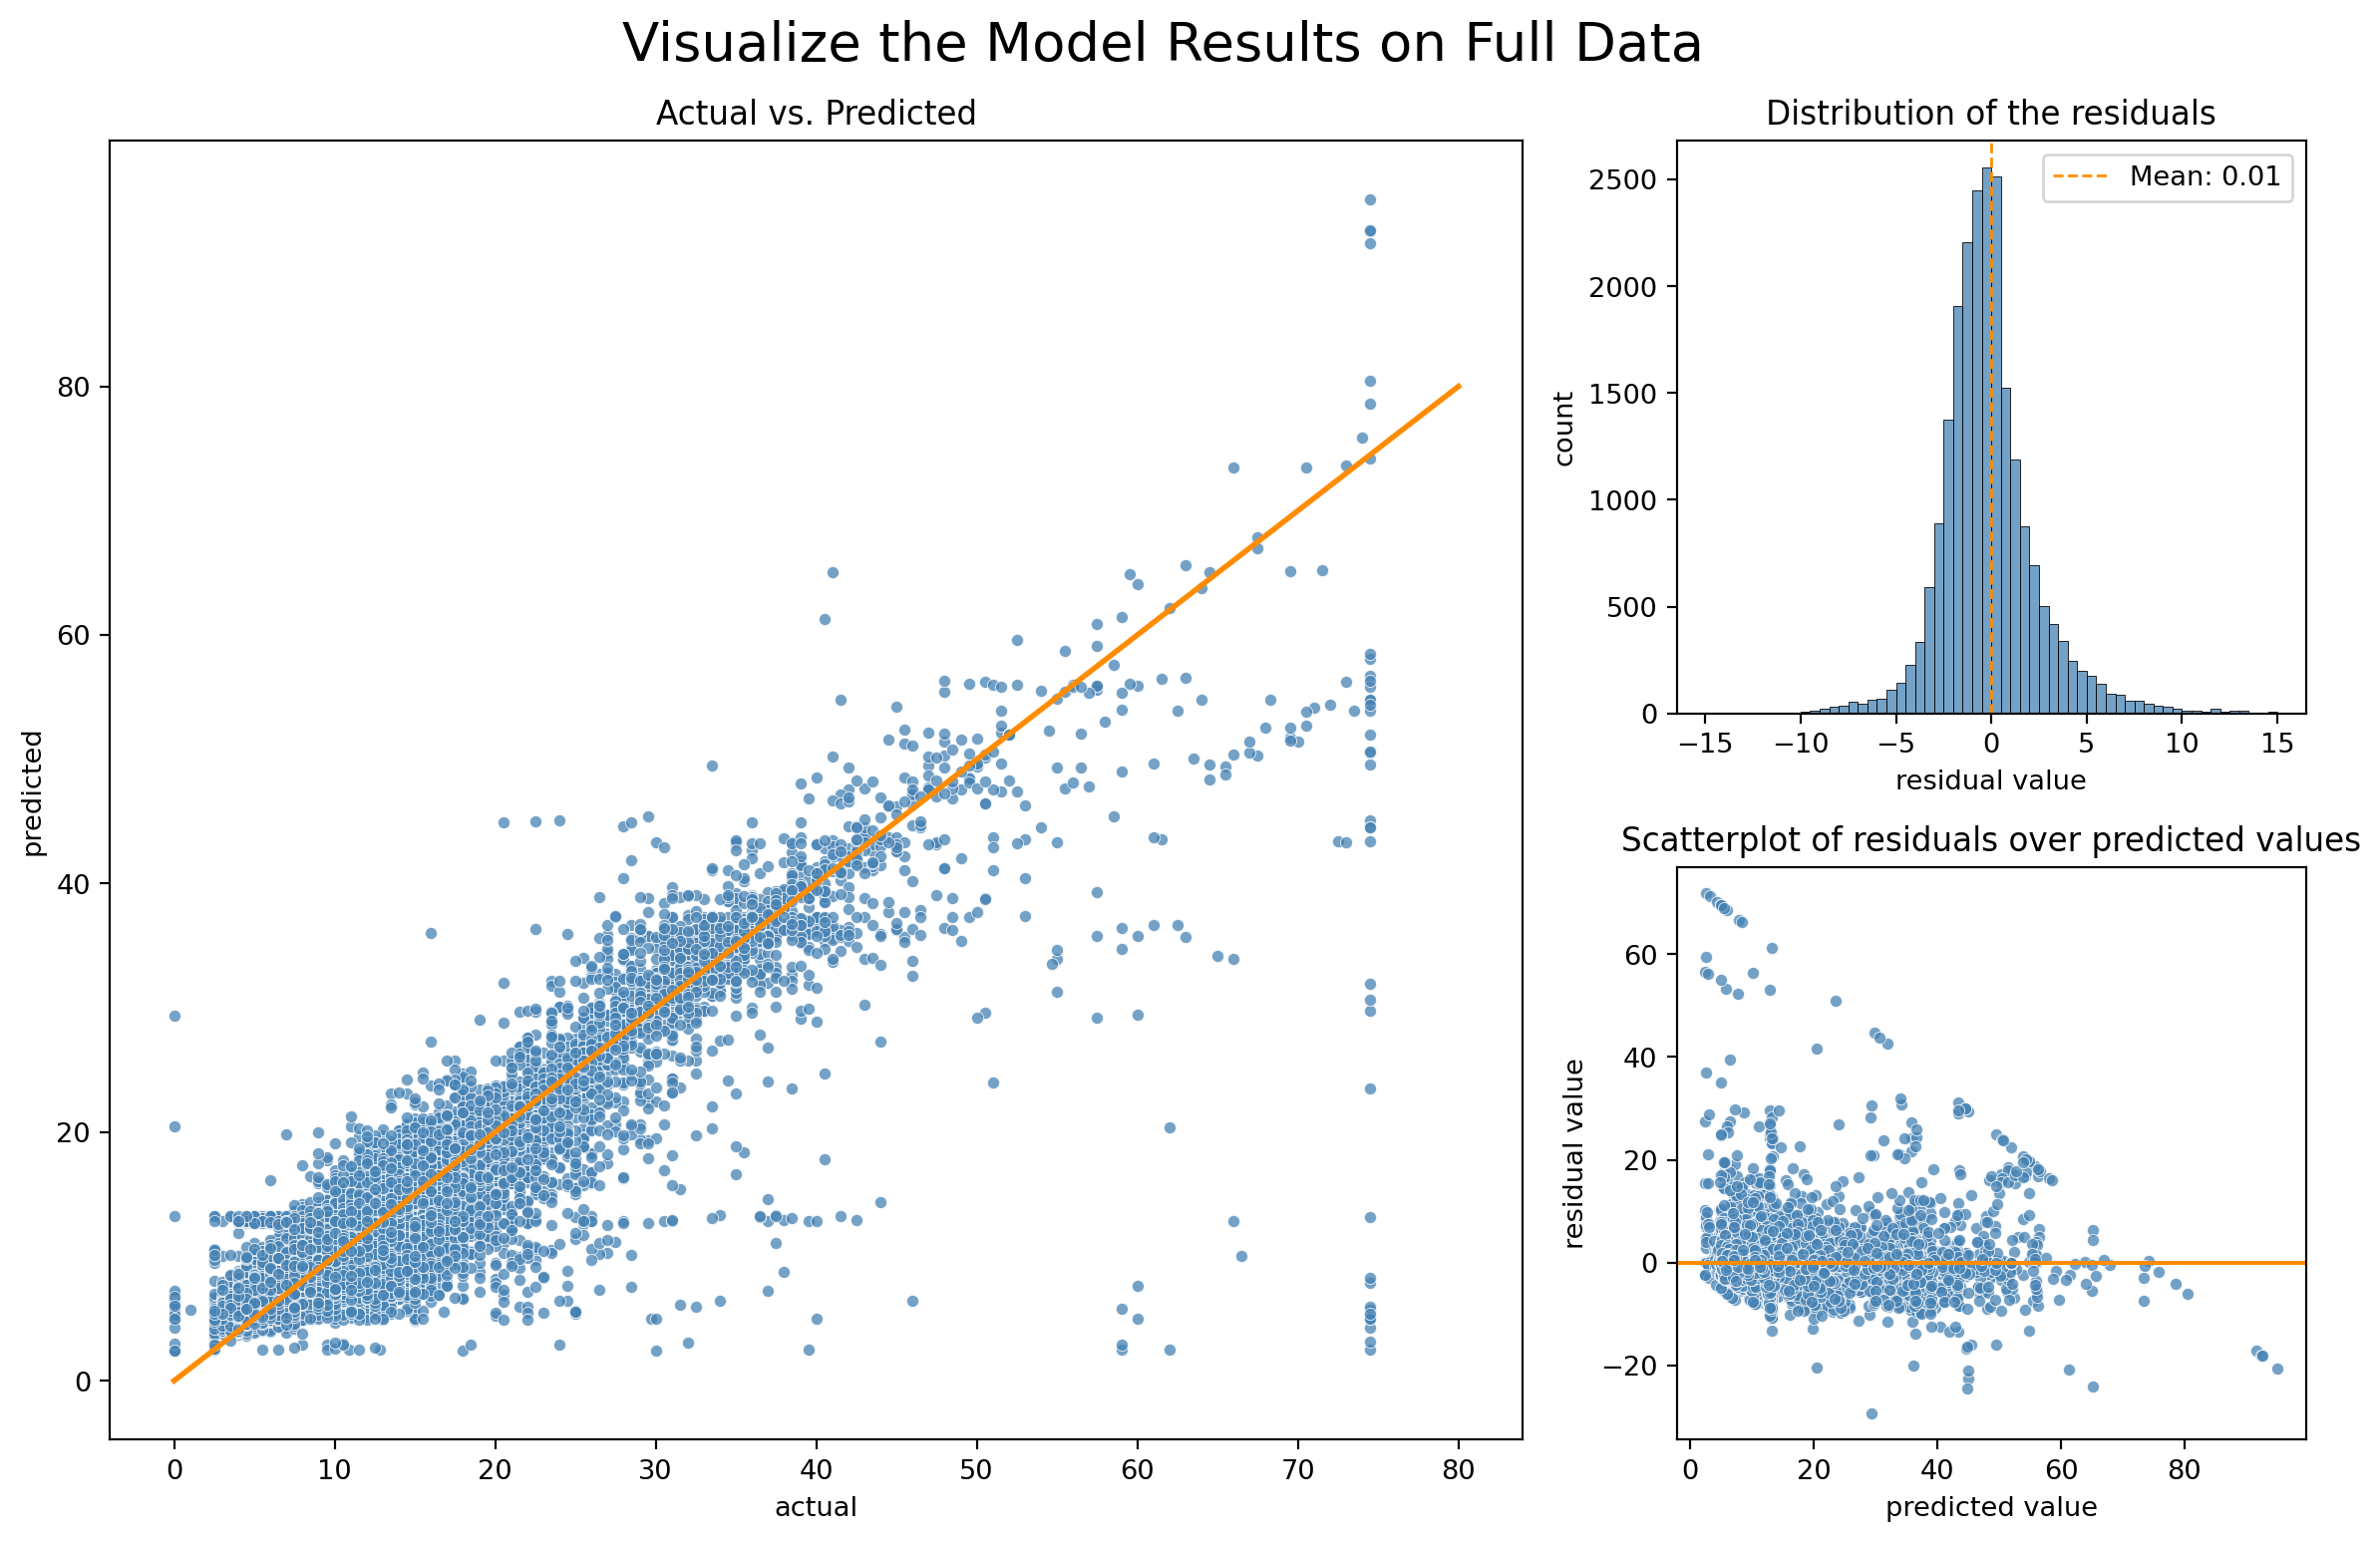

In [34]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y['fare_amount'],
                             'predicted': final_preds})
results['residual'] = results['actual'] - results['predicted']

#Figure setup
fig = plt.figure(figsize=(12,8), dpi=196)
ax1 = plt.subplot2grid((2,3),(0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid((2,3),(0,2), colspan=1)
ax3 = plt.subplot2grid((2,3),(1,2), colspan=1)

# Create a scatterplot to visualize `predicted` over `actual`
ax1 = sns.scatterplot(data=results, x='actual', y='predicted',
                s=20, color='steelblue', alpha=0.75,
                ax=ax1)

# Draw an x=y line to show what the results would be if the model were perfect
ax1.plot([0,80], [0,80], c='darkorange', linewidth=2)
ax1.set_title('Actual vs. Predicted')

# Visualize the distribution of the `residuals`
ax2 = sns.histplot(results['residual'], 
             bins=np.arange(-15,15.5,0.5),
             color='steelblue',    
             ax=ax2)
mean_value = round(results['residual'].mean(),3)
ax2.axvline(mean_value, 
            color='darkorange', linestyle='dashed', linewidth=1, 
            label=f'Mean: {mean_value:.2f}')
ax2.legend()

ax2.set_xlabel('residual value')
ax2.set_ylabel('count')
ax2.set_title('Distribution of the residuals')

# Create a scatterplot of `residuals` over `predicted`
ax3 = sns.scatterplot(x='predicted', y='residual', data=results,
                      s=20, color='steelblue', alpha=0.75,
                      ax=ax3)
ax3.axhline(0, c='darkorange')
ax3.set_xlabel('predicted value')
ax3.set_ylabel('residual value')
ax3.set_title('Scatterplot of residuals over predicted values')

# Set title and layout
title = 'Visualize the Model Results on Full Data'
fig.suptitle(title, fontsize=20)
fig.tight_layout()
plt.show()
fig.savefig('evaluation/model_result_on_full_data.png')
plt.close()

In [35]:
# Join final predictions, mean_duration and mean_distance columns back to df
df_pred = df
df_pred[['mean_duration', 'mean_distance']] = X[['mean_duration', 'mean_distance']]
df_pred['predicted_fare'] = final_preds

# Save df for next task
path = '/kaggle/working/'
df_pred.to_csv(path+'df_mean_pred.csv', index=False)

# **<font color=#0aa858>Execute</font> Stage**

In [36]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)

# 1. Calculate SD of `mean_distance` in X_train data
print('σ of mean_distance:',X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print('fare rate: ', 
      coefficients.loc[0,'mean_distance'] / X_train['mean_distance'].std())
coefficients

σ of mean_distance: 2.8128475607142653
fare rate:  2.1508314668530586


VendorID  passenger_count  rush_hour  mean_distance  mean_duration
0 -0.057906         0.052846   0.180093       6.049961       2.488939

interpretation: for every 2.81 miles traveled, the fare increased by a mean of \\$6.60. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$2.35.

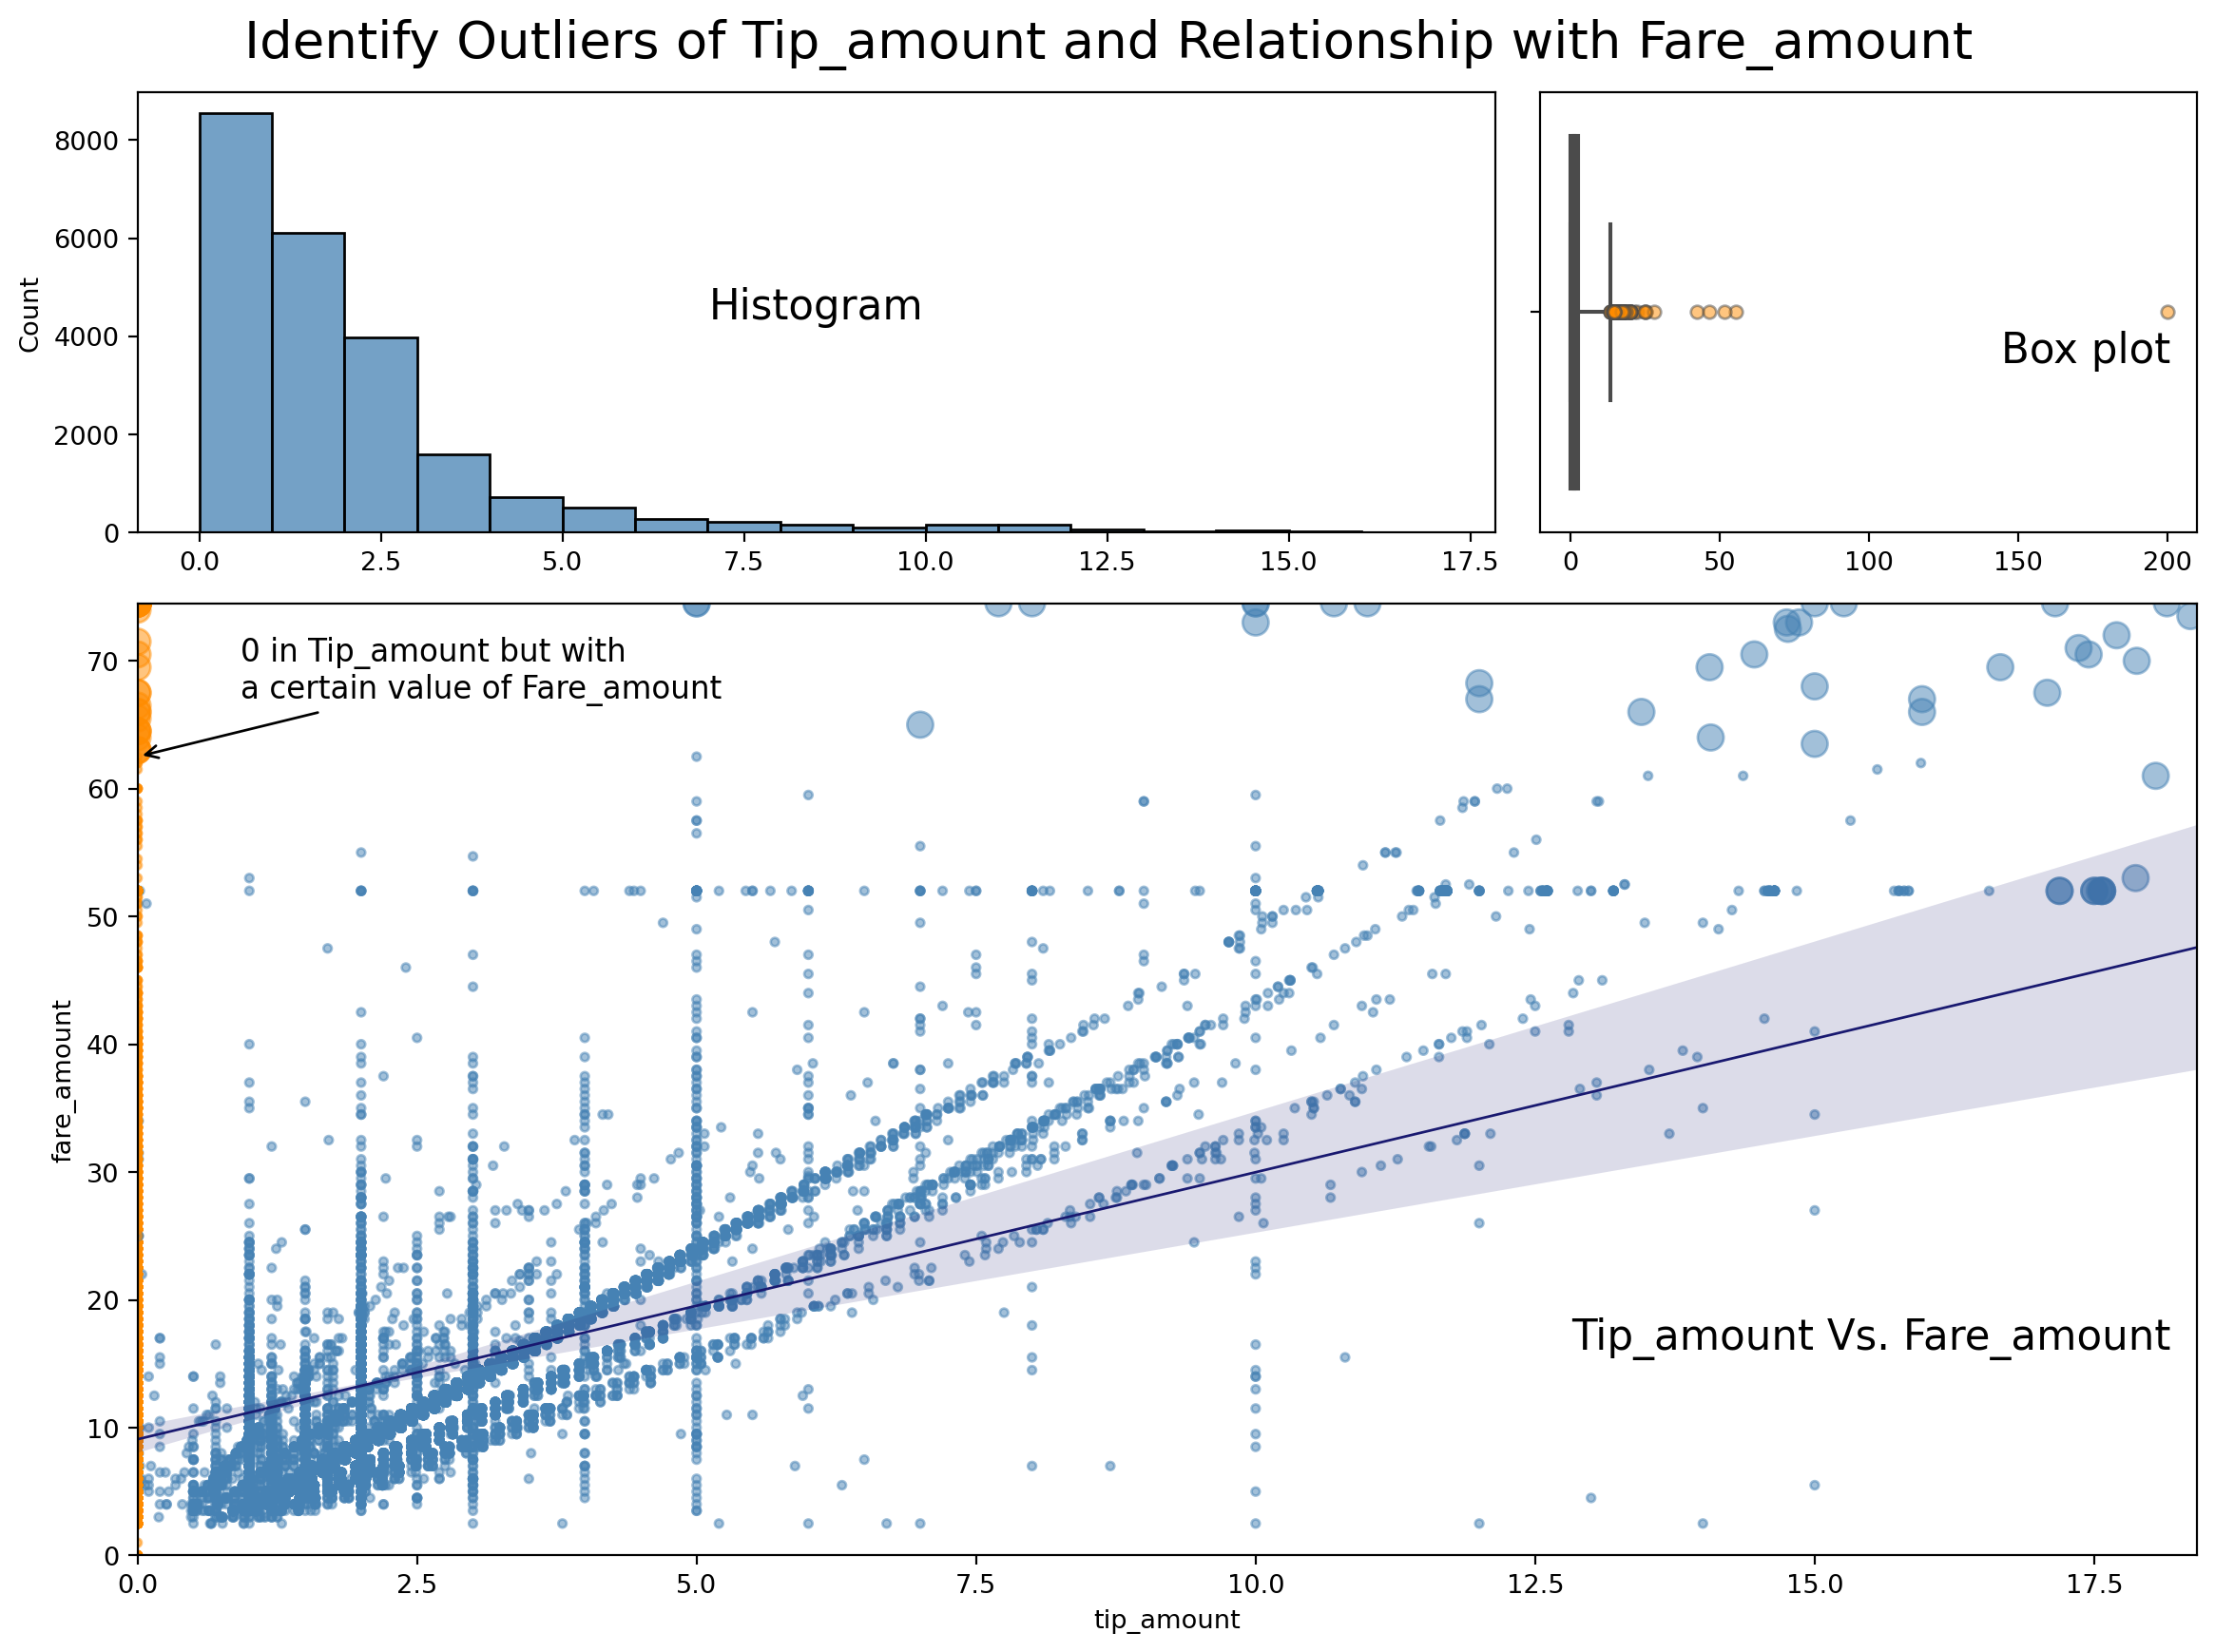

In [37]:
# Identify outliers of tips and relationship between tips&fares
x_val = df['tip_amount']
y_val = df['fare_amount']
x_stats = x_val.describe()
y_stats = y_val.describe()

# Caculate possible limits for both axes
iqr_x = x_stats['75%'] - x_stats['25%']
iqr_y = y_stats['75%'] - y_stats['25%']
# set min or 1.5IQR from Q1 as lower limit, 
# 1.5IQR is a common factor
l_lmt_x = max(x_stats['25%']-(iqr_x*1.5), x_stats['min'])
l_lmt_y = max(y_stats['25%']-(iqr_y*1.5), y_stats['min'])
# set 99.9% position or 15IQR from Q3 as upper limit, 
# 15IQR is the max value of trip_distance from its' Q3 value
u_lmt_x = min(x_stats['75%']+(iqr_x*15), x_val.quantile(0.999))
u_lmt_y = min(y_stats['75%']+(iqr_y*15), y_val.quantile(0.999))

# Identify outliers and abnormal values
otlr = (y_val>(y_stats['75%']+(iqr_y*6))) | (x_val>(x_stats['75%']+(iqr_x*6)))
neg = (y_val<0) | (x_val<0)
zero = (y_val==0) | (x_val==0)
size = [100 if b==True else 10 for b in otlr|neg]
color = ['darkorange' if b==True else 'steelblue' for b in zero|neg]

#Figure layout setup
fig = plt.figure(figsize=(12,9), dpi=196)
ax1 = plt.subplot2grid((3,3),(0,0), colspan=2)
ax2 = plt.subplot2grid((3,3),(0,2), colspan=1)
ax3 = plt.subplot2grid((3,3),(1,0), colspan=3, rowspan=2)

# Plot a histogram for trip_distance at ax1
fig1 = sns.histplot(data=None, x=x_val, 
                    bins=range(int(l_lmt_x),int(u_lmt_x)), # set the x-axis limits
                    color='steelblue',
                    ax=ax1) # layout location
fig1.set_xlabel(None)
fig1.set_title('Histogram',fontsize=16,
          y=0.45, loc='center') # title location

# Plot a box plot for trip_distance
fig2 = sns.boxplot(data=None, x=x_val, whis=4.5, 
                   flierprops=dict(marker='o', 
                                   markerfacecolor='darkorange',
                                   linewidth=0,alpha=0.5),
                   color='steelblue',
                   ax=ax2) # layout location
fig2.set_xlabel(None)
fig2.set_title('Box plot  ',fontsize=16,
          y=0.35, loc='right') # title location

# Plot scatter of distance and fares
fig3 = sns.regplot(data=df, x=x_val, y=y_val, 
                   ci=95, scatter=True,
                   scatter_kws={'s': size, # enlarge outliers
                                'color': color, # highlight with color
                                'alpha': 0.5}, 
                   line_kws={'color': 'midnightblue',
                             'linewidth': 1},                   
                   ax=ax3) # layout location
fig3.set_xlim(l_lmt_x, u_lmt_x)
fig3.set_ylim(l_lmt_y, u_lmt_y)
fig3.set_title('{} Vs. {}  '.format(x_val.name.capitalize(),
               y_val.name.capitalize()), fontsize=16,
               y=0.2, loc='right') # title location
annotate = '0 in {} but with \na certain value of {} '.format(
              x_val.name.capitalize(), y_val.name.capitalize())
fig3.annotate(annotate, fontsize=12,
              xy=(0,y_stats['75%']+(iqr_y*6)), # arrow positoin
              xytext=(u_lmt_x*0.05,u_lmt_y*0.9), # annotate positoin
              arrowprops=dict(arrowstyle='->',
                              facecolor='black'))

# Set title and layout
title = 'Identify Outliers of {} and Relationship with {}'.format(
             x_val.name.capitalize(), y_val.name.capitalize())
fig.suptitle(title, fontsize=20)
fig.tight_layout()
plt.show()

fig.savefig('EDA/x-{}y-{}.png'.format(
    x_val.name.capitalize(), y_val.name.capitalize()))